# **Evaluation Project -4 : Global Power Plant Database**

### Problem Statement:

### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

**Key attributes of the database**

The database includes the following indicators:

* country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* country_long (text): longer form of the country designation
* name (text): name or title of the power plant, generally in Romanized form
* gppd_idnr (text): 10 or 12 character identifier for the power plant
* capacity_mw (number): electrical generating capacity in megawatts
* latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* other_fuel1 (text): energy source used in electricity generation or export
* other_fuel2 (text): energy source used in electricity generation or export
* other_fuel3 (text): energy source used in electricity generation or export
* commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
* owner (text): majority shareholder of the power plant, generally in Romanized form
* source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* url (text): web document corresponding to the source field
* geolocation_source (text): attribution for geolocation information
* wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* year_of_capacity_data (number): year the capacity information was reported
* generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
* generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
* generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
* generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
* generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
* generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
* generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
* generation_data_source (text): attribution for the reported generation information
* estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
* estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
* estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
* estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
* estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
* estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
* estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
* estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
* estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
* estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

**Fuel Type Aggregation**

We define the "Fuel Type" attribute of our database based on common fuel categories.

* Prediction :
    
    Make two prediction : 1) Primary Fuel 2) capacity_mw

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing the DATASET

In [2]:
power_plant=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

## Checking Top 5 rows Data

In [3]:
power_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## EDA

### Checking Total Numbers of Rows and Column

In [4]:
power_plant.shape

(907, 27)

### Checking All Column Names

In [5]:
power_plant.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

### Checking Data Type of All Data

In [6]:
power_plant.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

## Checking for Null Values

In [7]:
power_plant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

## Observation:

**Null values are present in our dataset**

* column "other_fuel2" have 906 out of 907, so we will drop this column as we can not take mode of it.
* column "other_fuel3" contains only null value data, so we will drop this column as it have no realtion with our target column.
* column "wepp_id" contains only null value data, so we will drop this column as it have no realtion with our target column.
* column "generation_gwh_2013" contains only null value data, so we will drop this column as it have no realtion with our target column.
* column "generation_gwh_2019" contains only null value data, so we will drop this column as it have no realtion with our target column.
* column "estimated_generation_gwh" contains only null value data, so we will drop this column as it have no realtion with our target column.
* We will handle rest column containing null value with mean, mode etc.


### Checking for Null Values through heatmap also

<AxesSubplot:>

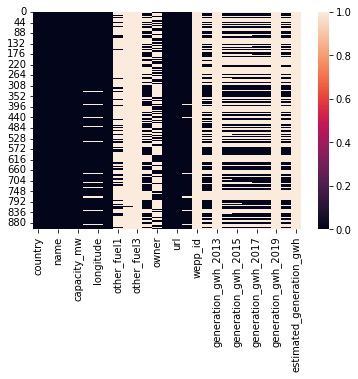

In [8]:
sns.heatmap(power_plant.isnull())

Here, we can see there is Null Values present in 19 columns: latitude, longitude, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh

### Information about Data (Memory Used and Data Types)

In [9]:
power_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### Checking for blank value in our Both Target Column

In [10]:
power_plant[power_plant['primary_fuel'] == ''].index

Int64Index([], dtype='int64')

In [11]:
power_plant[power_plant['capacity_mw'] == ''].index

Int64Index([], dtype='int64')


So, we can check there are no blank value present in our both Target Column

In [12]:
# Checking whether the dataset contains any space
power_plant.loc[power_plant['primary_fuel']==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [13]:
power_plant.loc[power_plant['capacity_mw']==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


So we can see there are no spaces present in the dataset.

### Checking unique values present in the Target Variable.

In [14]:
power_plant['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [15]:
power_plant['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [16]:
power_plant['primary_fuel'].nunique()

8

In [17]:
power_plant['capacity_mw'].nunique()

361

### Total Values in the target variable

In [18]:
power_plant['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [19]:
power_plant['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

## Data Cleaning and preprocessing

Since there are Null values in the dataset, so we need to treat them.

#### Handling Null Values

In [20]:
#Filling Null Values of "latitude" column in dataset by mean value
power_plant["latitude"].fillna(power_plant["latitude"].mean(), inplace=True)

In [21]:
#Filling Null Values of "longitude" column in dataset by mean value
power_plant["longitude"].fillna(power_plant["longitude"].mean(), inplace=True)

In [22]:
#checking all values of column 'other_fuel1'
power_plant["other_fuel1"].unique() 

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [23]:
#checking repeated values in "other_fuel1" column through mode
print( power_plant["other_fuel1"].mode())

0    Oil
dtype: object


In [24]:
#Droping column 'other_fuel1' as it have only one type of value that is 'Oil' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="other_fuel1", axis=1)

In [25]:
#Droping "other_fuel2 " column from dataset because most of the values (906) are missing and we can not take mean, mode etc of it as our total data is 907. So, we will drop this column.
power_plant=power_plant.drop(columns="other_fuel2", axis=1)

In [26]:
#Droping "other_fuel3" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="other_fuel3", axis=1)

In [27]:
#checking all values of column 'commissioning_year'
power_plant["commissioning_year"].unique() 

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [28]:
#Filling Null Values of "commissioning_year" column in dataset by mean value
power_plant["commissioning_year"].fillna(power_plant["commissioning_year"].mean(), inplace=True)

In [29]:
#checking all values of column 'owner'
power_plant["owner"].unique() 

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [30]:
#checking repeated values in "owner" column through mode
print(power_plant["owner"].mode())

0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
dtype: object


In [31]:
#Droping "owner" column from dataset because this column's data have no relation with our Target Column. 
power_plant=power_plant.drop(columns="owner", axis=1)

In [32]:
#checking all values of column 'geolocation_source'
power_plant["geolocation_source"].unique() 

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [33]:
#checking repeated values in "geolocation_source" column through mode
print(power_plant["geolocation_source"].mode())

0    WRI
dtype: object


In [34]:
#Filling Null Values of "geolocation_source" column in dataset by mode value
power_plant["geolocation_source"].fillna(power_plant["geolocation_source"].mode()[0], inplace=True)

In [35]:
#Droping "wepp_id" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="wepp_id", axis=1)

In [36]:
#Filling Null Values of "year_of_capacity_data" column in dataset by mean value
power_plant["year_of_capacity_data"].fillna(power_plant["year_of_capacity_data"].mean(), inplace=True)

In [37]:
#Droping "generation_gwh_2013" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="generation_gwh_2013", axis=1)

In [38]:
#Filling Null Values of "generation_gwh_2014" column in dataset by mode value
power_plant["generation_gwh_2014"].fillna(power_plant["generation_gwh_2014"].mean(), inplace=True)

In [39]:
#Filling Null Values of "generation_gwh_2015" column in dataset by mode value
power_plant["generation_gwh_2015"].fillna(power_plant["generation_gwh_2015"].mean(), inplace=True)

In [40]:
#Filling Null Values of "generation_gwh_2016" column in dataset by mode value
power_plant["generation_gwh_2016"].fillna(power_plant["generation_gwh_2016"].mean(), inplace=True)

In [41]:
#Filling Null Values of "generation_gwh_2017" column in dataset by mode value
power_plant["generation_gwh_2017"].fillna(power_plant["generation_gwh_2017"].mean(), inplace=True)

In [42]:
#Filling Null Values of "generation_gwh_2018" column in dataset by mode value
power_plant["generation_gwh_2018"].fillna(power_plant["generation_gwh_2018"].mean(), inplace=True)

In [43]:
#Droping "generation_gwh_2019" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="generation_gwh_2019", axis=1)

In [44]:
#checking all values of column 'generation_data_source'
power_plant["generation_data_source"].unique() 

array([nan, 'Central Electricity Authority'], dtype=object)

Here we can see only 2 values are in this column (nan, 'Central Electricity Authority'), So we will drop this column as it contains null value most.

In [45]:
#Droping "generation_data_source" column from dataset.
power_plant=power_plant.drop(columns="generation_data_source", axis=1)

In [46]:
#Droping "estimated_generation_gwh" column from dataset because all values (907) are missing. So, we will drop this column.
power_plant=power_plant.drop(columns="estimated_generation_gwh", axis=1)

### Again Checking for Null Values after Handling it

In [47]:
power_plant.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

**So, now our dataset have no null value after handling null values.**

In [48]:
#total Columns after handling null values
power_plant.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [49]:
#total Rows and Columns after handling null values
power_plant.shape

(907, 18)

## Descriptive Statistics

In [50]:
# Description of Dataset : works only on continuous column 
power_plant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


* We can check that 10 columns contains Continuous data: capacity_mw, latitude, longitude, commissioning_year, year_of_capacity_data, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018
* And 9 columns contains Categorical data: 'country', 'country_long', 'name', 'gppd_idnr','primary_fuel', 'owner', 'source', 'url', 'geolocation_source'.
* Here also we can see that there is no null value in aur dataset as count is 907 in each column.

## Checking Description through heatmap also.


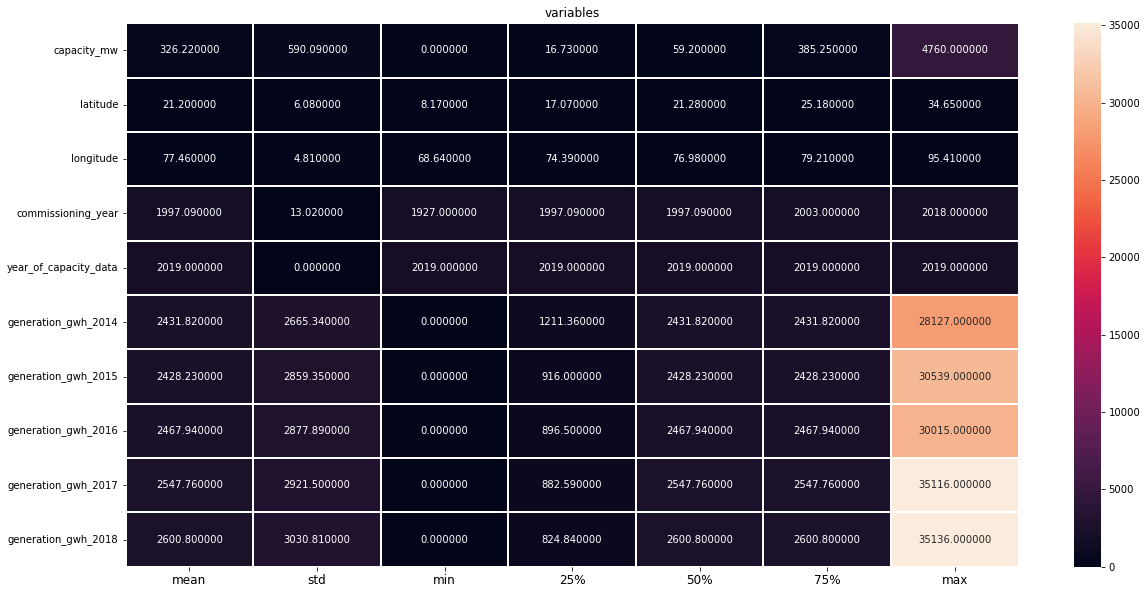

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(round(power_plant.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

### Outcome of Describe of Datasets:

* Value of Std is higher than mean which shows skewness is present in most columns, we will check for skewness later.
* We can see difference between 25% and 50% in columns ('generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018') are more compare to it's 50% and 75% (difference is 0), which shows outliers are present.
* difference between 25% and 50% in columns 'commissioning_year'is 0 and it's 50% and 75% (high difference), which shows outliers are present in it.
* Also in column "capacity_mw" difference is high between 50% and 75% compare to difference between 25% and 50%, which shows outliers are present in it.
* year_of_capacity_data have only one type of data, which means it have no relation with our target column, so we will drop this column also.

In [52]:
power_plant["year_of_capacity_data"].unique

<bound method Series.unique of 0      2019.0
1      2019.0
2      2019.0
3      2019.0
4      2019.0
        ...  
902    2019.0
903    2019.0
904    2019.0
905    2019.0
906    2019.0
Name: year_of_capacity_data, Length: 907, dtype: float64>

In [53]:
#Droping column 'year_of_capacity_data' as it have only one type of value that is '2019' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="year_of_capacity_data", axis=1)

In [54]:
# checking total Columns after droping column "year_of_capacity_data"
power_plant.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [55]:
power_plant["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [56]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
power_plant=power_plant.drop(columns="gppd_idnr", axis=1)

In [57]:
power_plant["country"].value_counts()

IND    907
Name: country, dtype: int64

In [58]:
#Droping column 'country' as it have only one type of value that is 'IND' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="country", axis=1)

In [59]:
power_plant["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [60]:
#Droping column 'country_long' as it have only one type of value that is 'India' and thus it have no relation with our Target column
power_plant=power_plant.drop(columns="country_long", axis=1)

In [61]:
power_plant["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [62]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
power_plant=power_plant.drop(columns="name", axis=1)

In [63]:
power_plant["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [64]:
#Droping column 'source' as it have no relation with our Target column
power_plant=power_plant.drop(columns="source", axis=1)

In [65]:
power_plant["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [66]:
#Droping column 'url' as it have no relation with our Target column
power_plant=power_plant.drop(columns="url", axis=1)

In [67]:
power_plant["geolocation_source"].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [68]:
power_plant.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [69]:
# checking total Rows and Columns after droping column "year_of_capacity_data"
power_plant.shape

(907, 11)

In [70]:
power_plant.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,1997.091082,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,1997.091082,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [71]:
power_plant.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# Data Visualization


### Using Countplot for categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

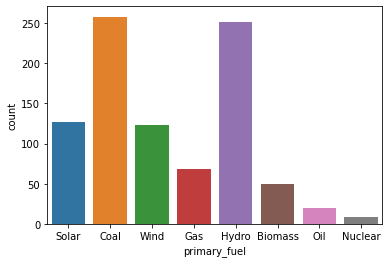

In [72]:
#Count Plot for "primary_fuel" column
print(power_plant["primary_fuel"].value_counts())

sns.countplot("primary_fuel",data=power_plant)

Coal is used most as primary_fuel and Nuclear as least

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

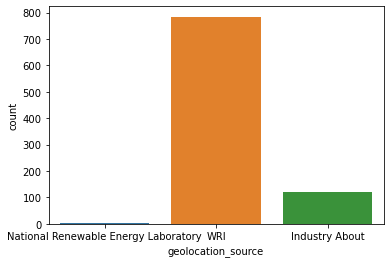

In [73]:
#Count Plot for "geolocation_source" column
print(power_plant["geolocation_source"].value_counts())

sns.countplot("geolocation_source",data=power_plant)

'WRI' is used more as geolocation_source then 'Industry About' and then 'National Renewable Energy Laboratory'

### Using Histplot for continuous columns

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

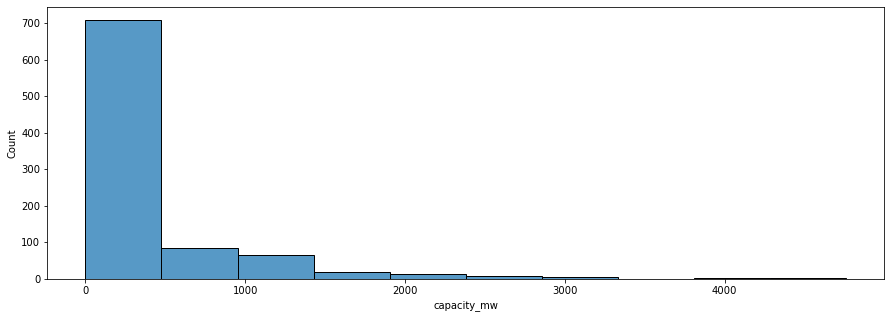

In [74]:
#Histplot for "capacity_mw" column
print(power_plant["capacity_mw"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='capacity_mw',data=power_plant,bins=10)

capacity_mw between 0 to 500 is highest.

21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: latitude, Length: 837, dtype: int64


<AxesSubplot:xlabel='latitude', ylabel='Count'>

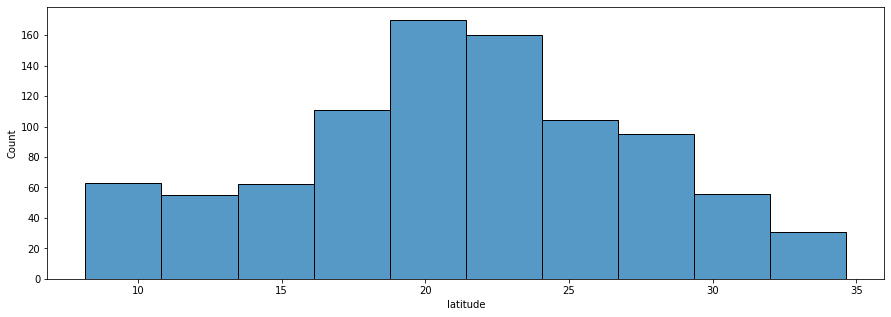

In [75]:
#Histplot for "latitude" column
print(power_plant["latitude"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='latitude',data=power_plant,bins=10)

Latitude in between 19-21 is highest.

77.464907    46
71.691700     4
75.898800     3
71.691800     3
72.898300     3
             ..
70.396100     1
74.239300     1
77.043500     1
73.825400     1
77.476800     1
Name: longitude, Length: 828, dtype: int64


<AxesSubplot:xlabel='longitude', ylabel='Count'>

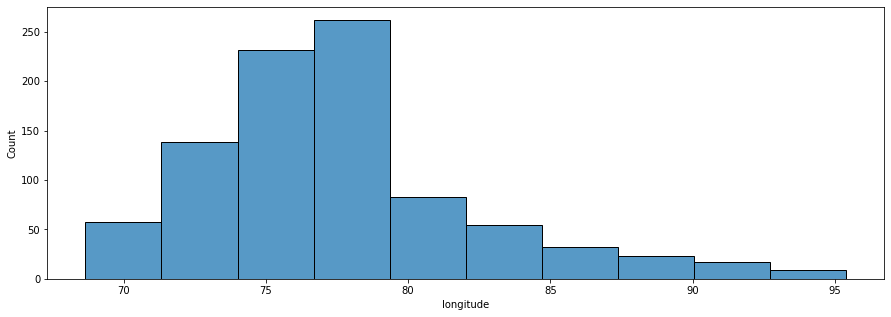

In [76]:
#Histplot for "longitude" column
print(power_plant["longitude"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='longitude',data=power_plant,bins=10)

longitude between 77 to 79 is highest.

1997.091082    380
2015.000000     28
2013.000000     25
2012.000000     23
2016.000000     19
              ... 
1946.000000      1
1956.000000      1
1937.000000      1
1949.000000      1
1953.000000      1
Name: commissioning_year, Length: 74, dtype: int64


<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

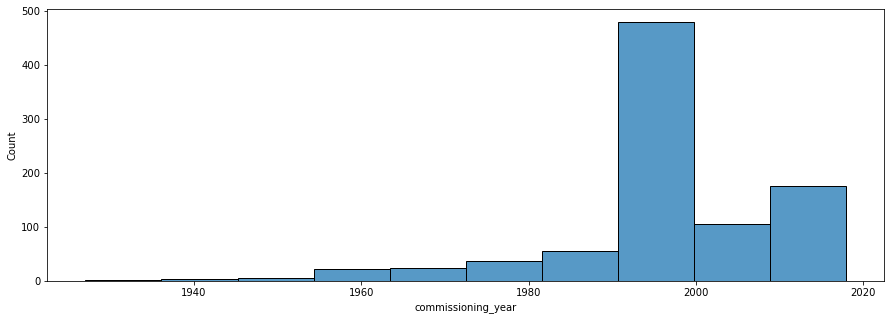

In [77]:
#Histplot for "commissioning_year" column
print(power_plant["commissioning_year"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='commissioning_year',data=power_plant,bins=10)

commissioning_year 1997 is highest.

2431.82359    509
0.00000        28
359.13980       1
7368.39000      1
9983.01800      1
             ... 
1154.34200      1
451.05340       1
3239.14290      1
3155.00000      1
3194.35982      1
Name: generation_gwh_2014, Length: 372, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Count'>

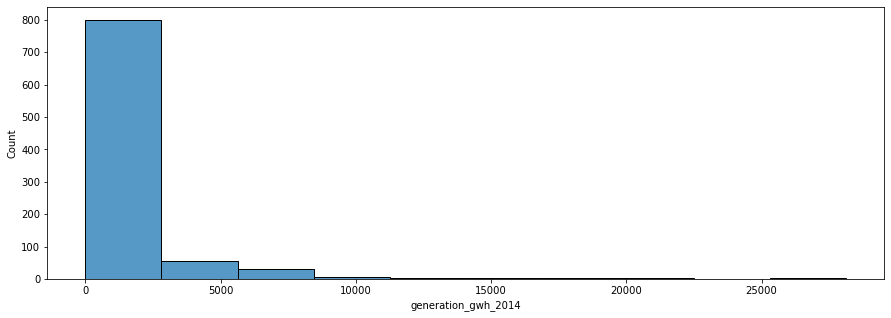

In [78]:
#Histplot for "generation_gwh_2014" column
print(power_plant["generation_gwh_2014"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2014',data=power_plant,bins=10)

generation_gwh_2014 between 0 to 2500 is highest.

2428.226946     485
0.000000         27
1497.798000       1
10422.690000      1
240.799900        1
               ... 
14192.000000      1
219.377600        1
288.460450        1
410.566850        1
0.994875          1
Name: generation_gwh_2015, Length: 397, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Count'>

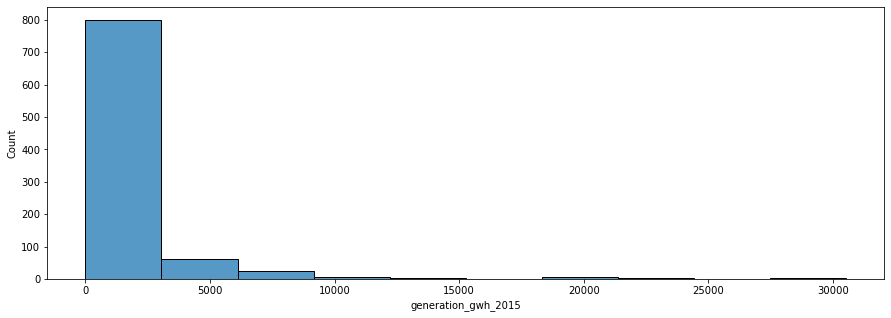

In [79]:
#Histplot for "generation_gwh_2015" column
print(power_plant["generation_gwh_2015"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2015',data=power_plant,bins=10)

generation_gwh_2015 between 0 to 2500 is highest.

2467.936859     473
0.000000         30
8470.570000       2
1511.000000       2
12.676300         1
               ... 
131.021600        1
6130.019928       1
5931.490000       1
14834.800000      1
233.596650        1
Name: generation_gwh_2016, Length: 404, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Count'>

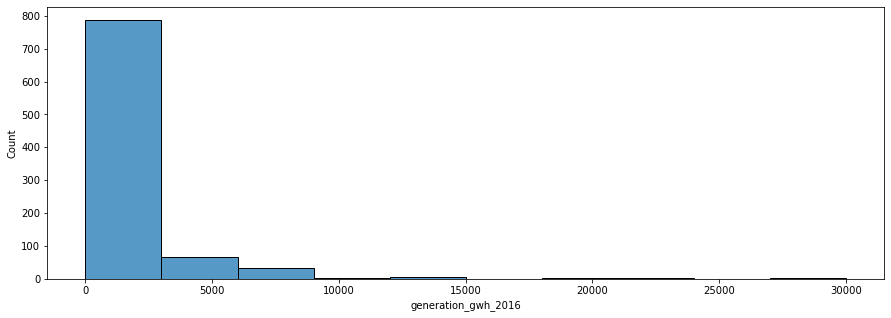

In [80]:
#Histplot for "generation_gwh_2016" column
print(power_plant["generation_gwh_2016"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2016',data=power_plant,bins=10)

generation_gwh_2016 between 0 to 2500 is highest.

2547.759305     467
0.000000         32
170.085300        2
272.739450        1
0.975100          1
               ... 
15177.000000      1
191.945450        1
307.375400        1
382.438200        1
865.400000        1
Name: generation_gwh_2017, Length: 409, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Count'>

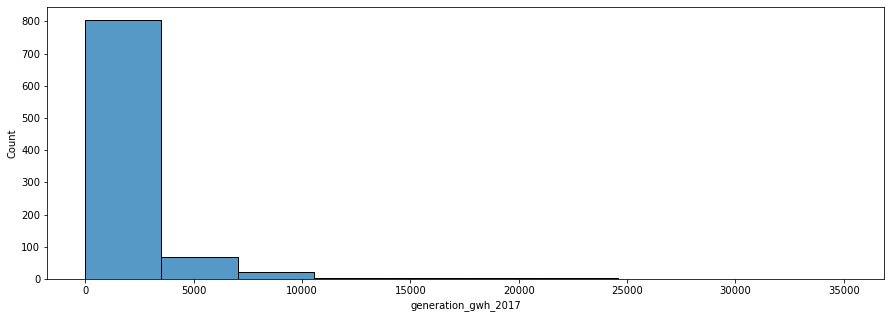

In [81]:
#Histplot for "generation_gwh_2017" column
print(power_plant["generation_gwh_2017"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2017',data=power_plant,bins=10)

generation_gwh_2017 between 0 to 2700 is highest.

2600.804099     459
0.000000         39
21.939750         1
17.213500         1
7200.400000       1
               ... 
7321.267900       1
6532.350000       1
15305.220000      1
373.970750        1
686.500000        1
Name: generation_gwh_2018, Length: 411, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Count'>

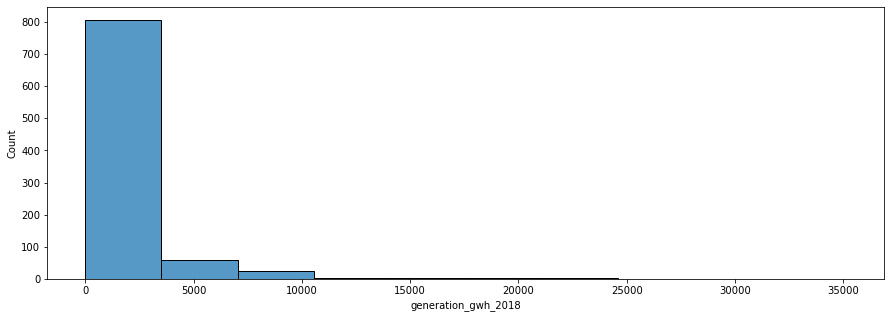

In [82]:
#Histplot for "generation_gwh_2018" column
print(power_plant["generation_gwh_2018"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2018',data=power_plant,bins=10)

generation_gwh_2018 between 0 to 2700 is highest.

## Bivariate Analysis

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

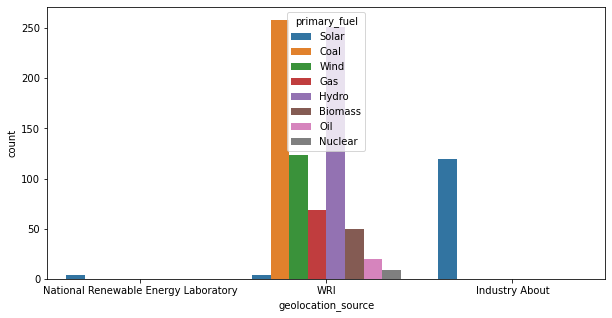

In [83]:
#Count Plot for comparision between "geolocation_source" column and "primary_fuel" column
plt.figure(figsize=(10,5))
sns.countplot("geolocation_source",data=power_plant, hue='primary_fuel')

We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

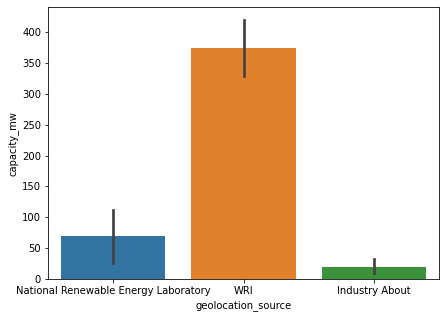

In [84]:
#Count Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source",data=power_plant, y='capacity_mw')

We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

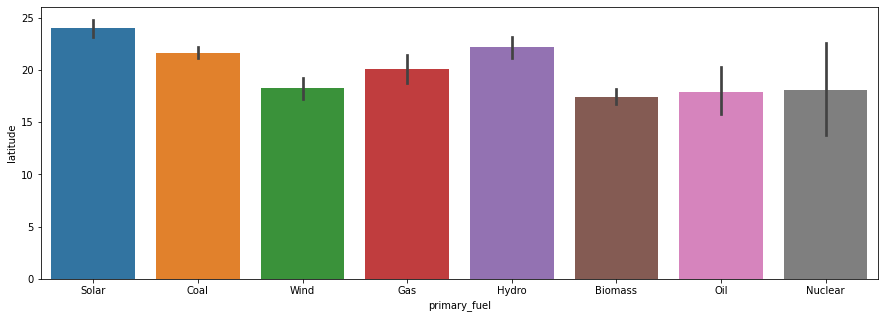

In [85]:
#hist Plot for comparision between "latitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="latitude",data=power_plant,x='primary_fuel')

We can see Solar is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

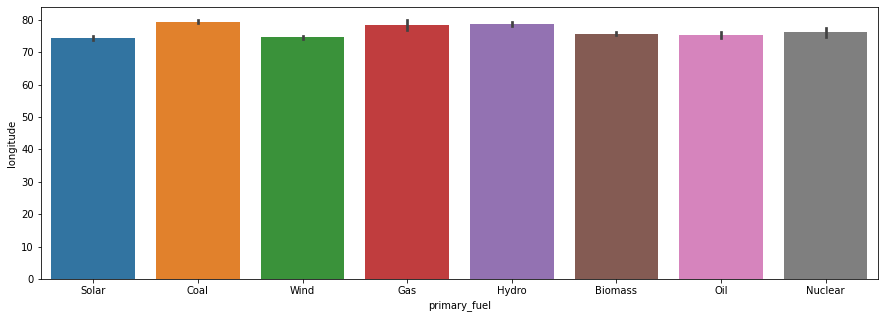

In [86]:
#hist Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=power_plant,x='primary_fuel')

We can see Coal is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

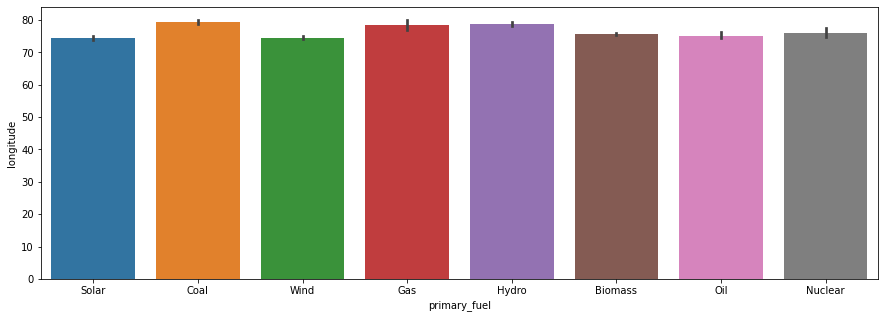

In [87]:
#Bar Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=power_plant,x='primary_fuel')

We can see Coal is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

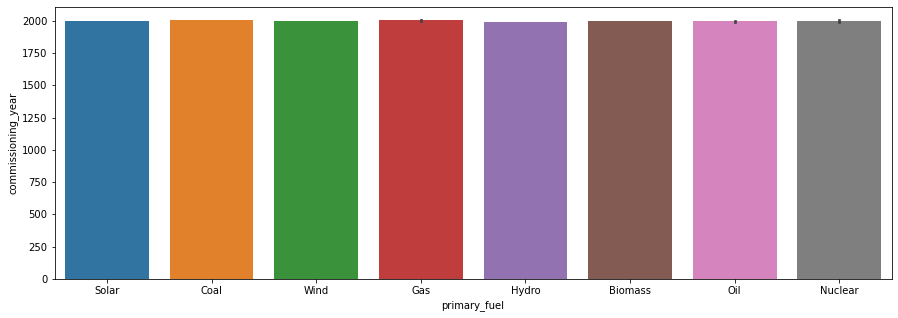

In [88]:
#Bar Plot for comparision between "commissioning_year" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="commissioning_year",data=power_plant,x='primary_fuel')

All primary_fuel used equally.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

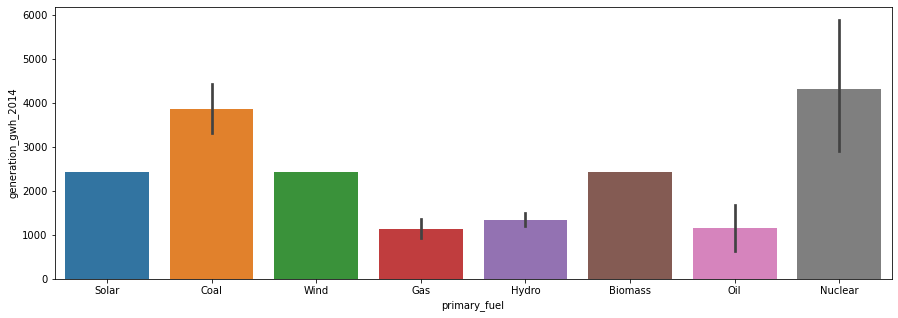

In [89]:
#Bar Plot for comparision between "generation_gwh_2014" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2014",data=power_plant,x='primary_fuel')

We can see Nuclear is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

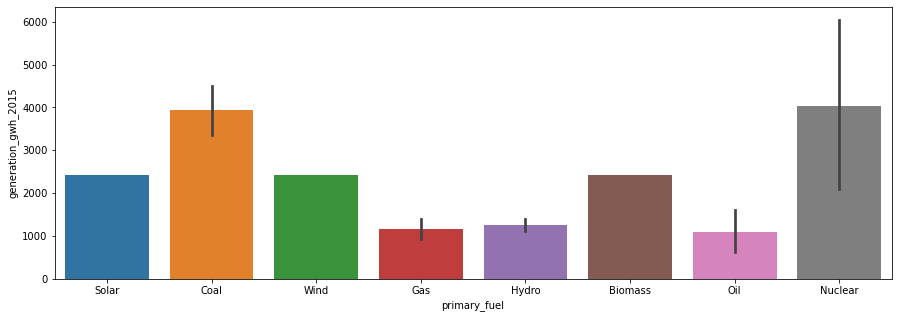

In [90]:
#Bar Plot for comparision between "generation_gwh_2015" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2015",data=power_plant,x='primary_fuel')

We can see Nuclear is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

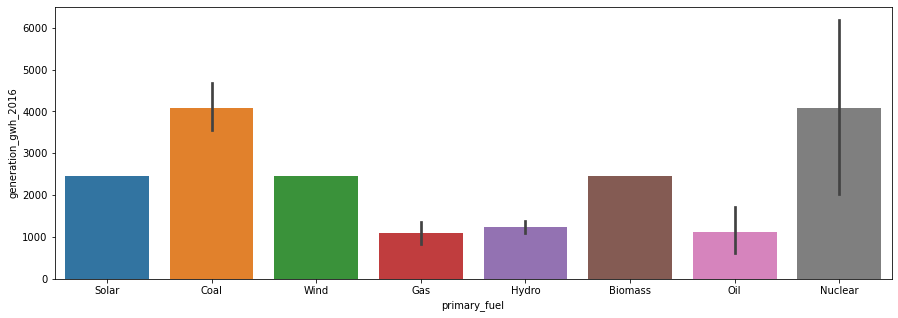

In [91]:
#Bar Plot for comparision between "generation_gwh_2016" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2016",data=power_plant,x='primary_fuel')

We can see Nuclear is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

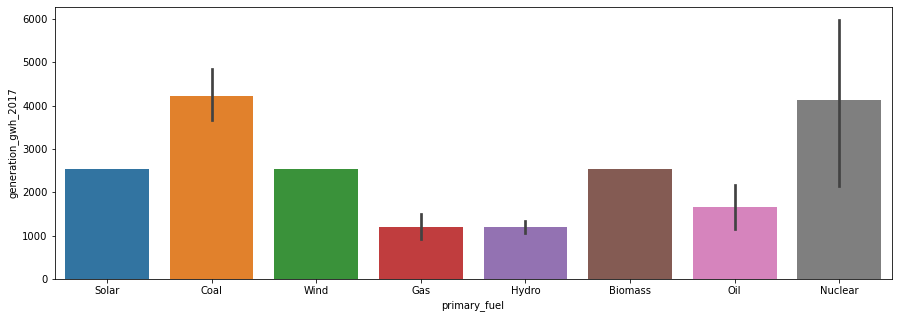

In [92]:
#Bar Plot for comparision between "generation_gwh_2017" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2017",data=power_plant,x='primary_fuel')

We can see Coal is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

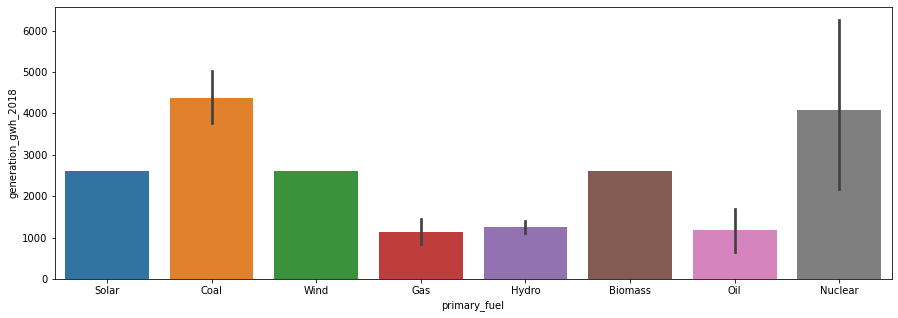

In [93]:
#Bar Plot for comparision between "generation_gwh_2018" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2018",data=power_plant,x='primary_fuel')

We can see Coal is used most.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

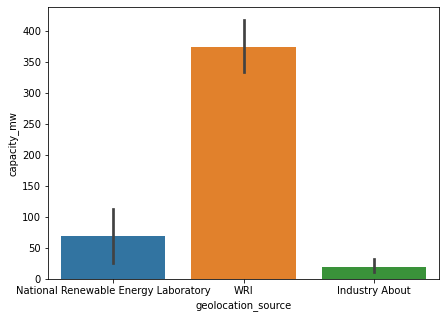

In [94]:
#Bar Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source",data=power_plant, y='capacity_mw')

We can see WRI is used most.

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

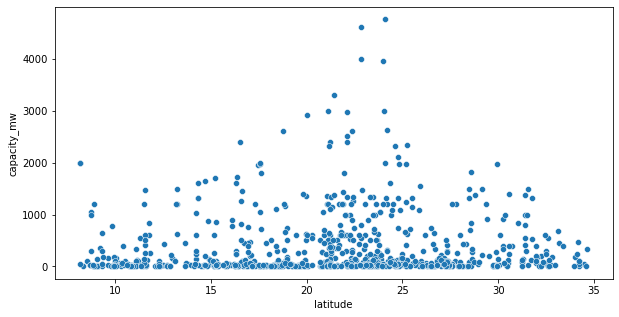

In [95]:
#scatterplot for comparision between "latitude" column and "capacity_mw" column
plt.figure(figsize=(10,5))
sns.scatterplot(x="latitude",data=power_plant, y='capacity_mw')

We can see it is there is correlation between "latitude" column and "capacity_mw" column.

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

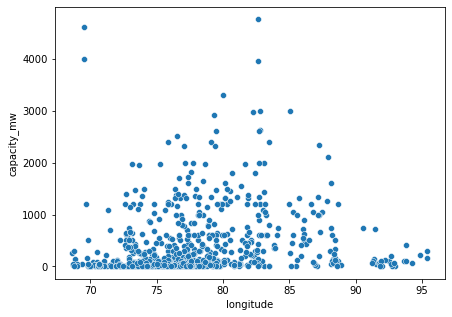

In [96]:
#scatterplot for comparision between "longitude" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="longitude",data=power_plant, y='capacity_mw')

We can see it is there is correlation between "longitude" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

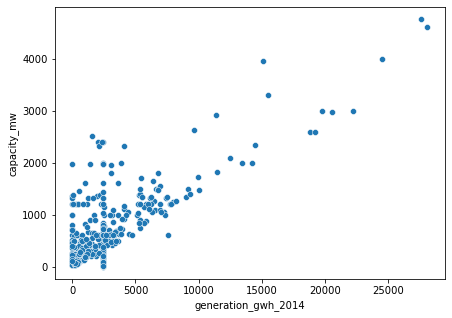

In [97]:
#scatterplot for comparision between "generation_gwh_2014" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2014",data=power_plant, y='capacity_mw')

We can see it is High Positive correlation between "generation_gwh_2014" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

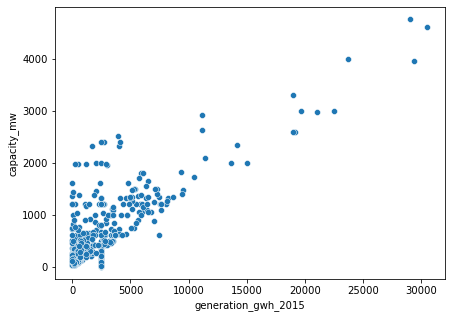

In [98]:
#scatterplot for comparision between "generation_gwh_2015" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2015",data=power_plant, y='capacity_mw')

We can see it is High Positive correlation between "generation_gwh_2015" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

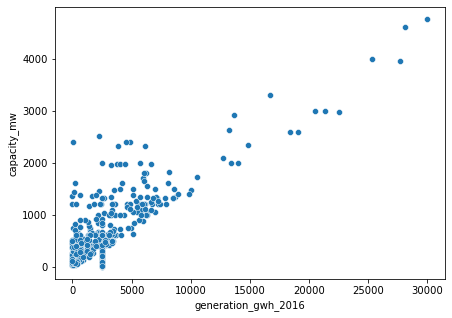

In [99]:
#scatterplot for comparision between "generation_gwh_2016" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2016",data=power_plant, y='capacity_mw')

We can see it is High Positive correlation between "generation_gwh_2016" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

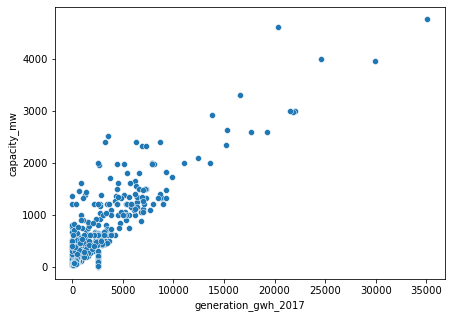

In [100]:
#scatterplot for comparision between "generation_gwh_2017" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2017",data=power_plant, y='capacity_mw')

We can see it is High Positive correlation between "generation_gwh_2017" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

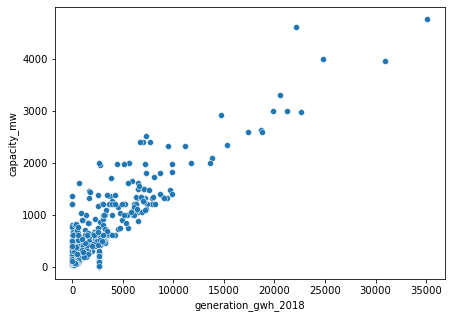

In [101]:
#scatterplot for comparision between "generation_gwh_2018" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2018",data=power_plant, y='capacity_mw')

We can see it is High Positive correlation between "generation_gwh_2018" column and "capacity_mw" column.

## Multivariate Analysis

#### Using barplot

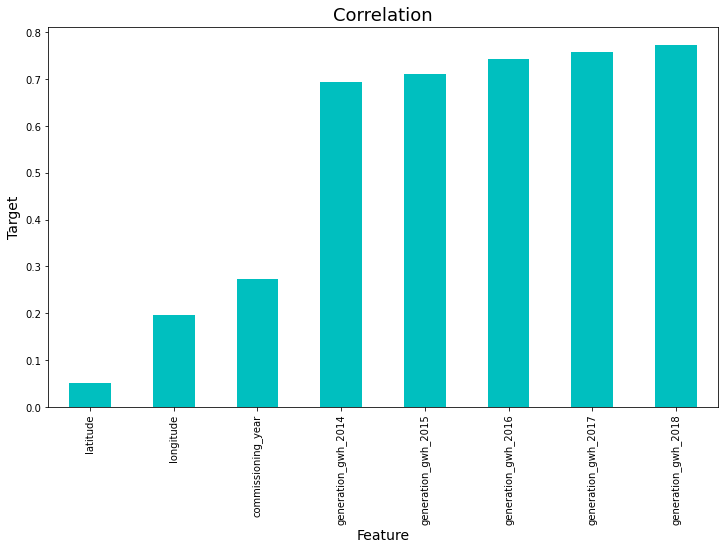

In [102]:
plt.figure(figsize=(12,7))
power_plant.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

We can see All Columns are positively correlated with target column "capacity_mw"

## Checking Correlation

In [103]:
power_plant.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,0.133051,0.147338,0.170644,0.170863,0.174377
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,0.884956,0.923461,0.957159,0.982689,1.000000


This gives the correlation between the denpendent and independent variables.

In [104]:
power_plant.corr()["capacity_mw"].sort_values()

latitude               0.050984
longitude              0.195882
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

### Observation:

* We can observe least correlation is with column "latitude" and strong correlation is with column "generation_gwh_2018".

* All columns are positively correlated with target column "capacity_mw".

### checking correlation with heatmap

<AxesSubplot:>

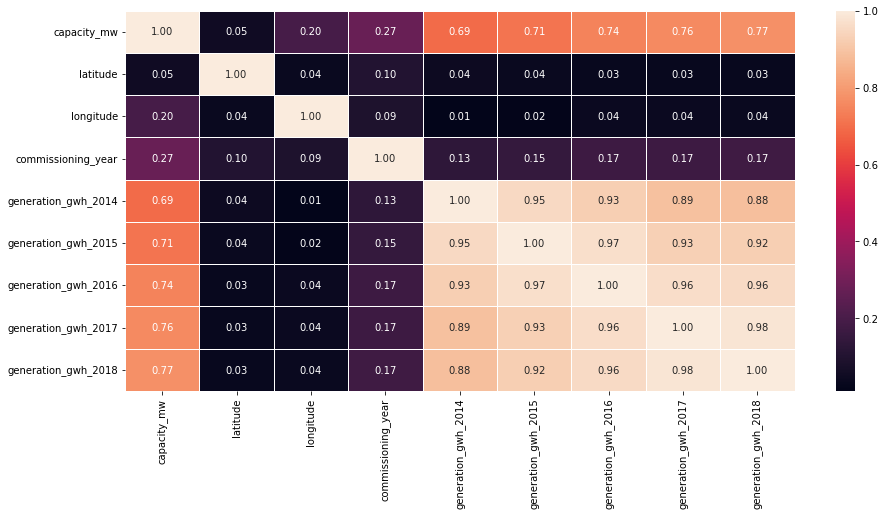

In [105]:
plt.figure(figsize=(15,7))
sns.heatmap(power_plant.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

## Outcome of Correlation with Target Column "capacity_mw" :

* 'latitude' has 5 percent correlation with the target column which can be considered as weak correlation and positively correlated.
* 'longitude' has 20 percent correlation with the target column which can be considered as good correlation and positively correlated.
* 'commissioning_year' has 27 percent correlation with the target column which can be considered as good correlation and positively correlated.
* 'generation_gwh_2014' has 69 percent correlation with the target column which can be considered as good correlation and positively correlated.
* 'generation_gwh_2015' has 71 percent correlation with the target column which can be considered as good correlation and positively correlated.
* 'generation_gwh_2016' has 74 percent correlation with the target column which can be considered as good correlation and positively correlated.
* 'generation_gwh_2017' has 76 percent correlation with the target column which can be considered as good correlation and positively correlated.
* 'generation_gwh_2018' has 77 percent correlation with the target column which can be considered as strong correlation and positively correlated.

* Min Correlation: latitude

* Max Correlation: generation_gwh_2018

### Label Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
enc = LabelEncoder()
for i in power_plant.columns:
    if power_plant[i].dtypes=="object":
        power_plant[i]=enc.fit_transform(power_plant[i].values.reshape(-1,1))

In [108]:
power_plant.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [109]:
power_plant.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

**Checking both target column unique value after transformation**

In [110]:
power_plant["primary_fuel"].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [111]:
power_plant["capacity_mw"].nunique()

361

### Checking dataset after transformation

In [112]:
power_plant.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [113]:
power_plant.shape

(907, 11)

In [114]:
power_plant.corr()["primary_fuel"].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

### Observation:

- All columns are negatively correlated with Target Column "primary_fuel"

- We can observe least correlation is with column "geolocation_source" and strong correlation is with column "latitude". 

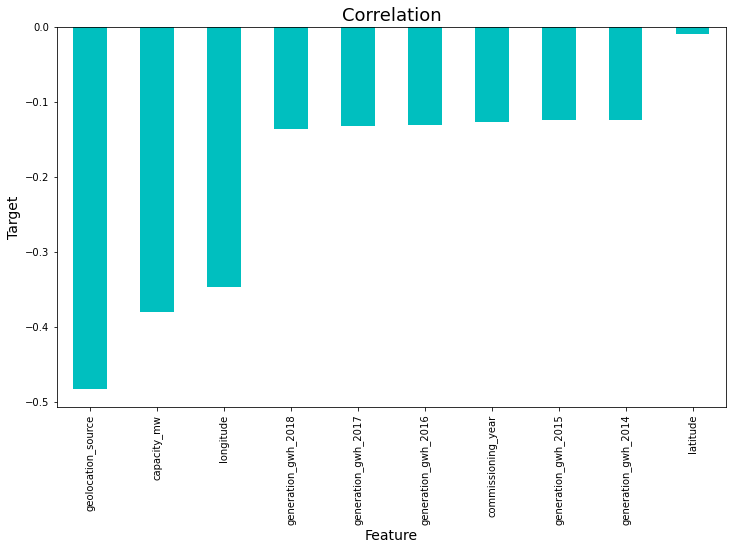

In [115]:
plt.figure(figsize=(12,7))
power_plant.corr()['primary_fuel'].sort_values(ascending=True).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

* All columns are negatively correlated with Target Column "primary_fuel"

<AxesSubplot:>

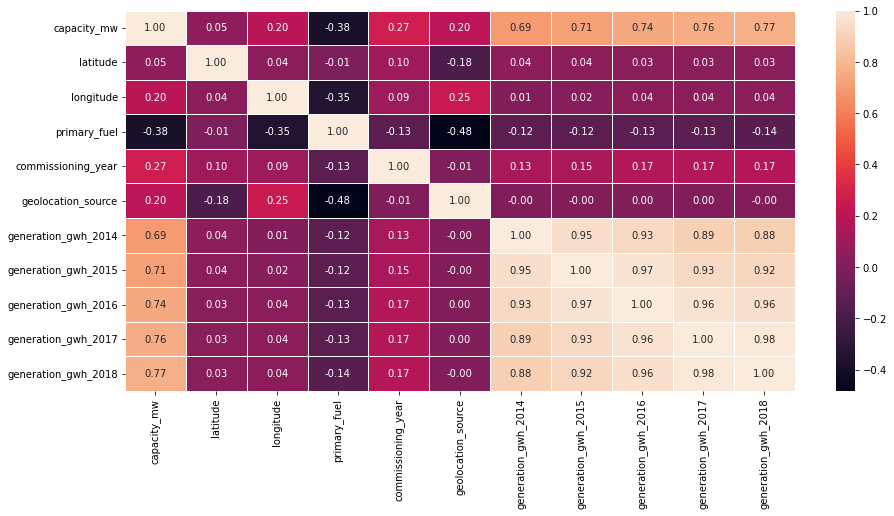

In [116]:
plt.figure(figsize=(15,7))
sns.heatmap(power_plant.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

## Outcome of Correlation with Target Column "primary_fuel" :

* 'capacity_mw' has -38 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* 'latitude' has -1 percent correlation with the target column which can be considered as strong correlation and negatively correlated.
* 'longitude' has -35 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* 'commissioning_year' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* 'geolocation_source' has -48 percent correlation with the target column which can be considered as weak correlation and negatively correlated.
* 'generation_gwh_2014' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* 'generation_gwh_2015' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* 'generation_gwh_2016' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* 'generation_gwh_2017' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
* 'generation_gwh_2018' has -14 percent correlation with the target column which can be considered as good correlation and negatively correlated.


* Min Correlation: geolocation_source

* Max Correlation: latitude

### Checking Outliers

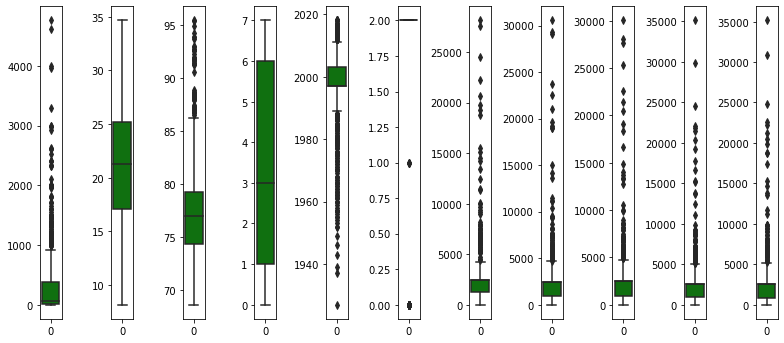

In [117]:
collist=power_plant.columns.values
ncol=11
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=power_plant[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [118]:
power_plant.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

### Observation:

* Outliers are present in columns: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'.
* Outliers are not present in columns: 'latitude' and 'primary_fuel'
* But we will not remove Outliers from 'geolocation_source' column as it is categorical column.
* Here we have to check two predictions : 'primary_fuel' and 'capacity_mw'. So we will remove outliers from 'capacity_mw' column when 'primary_fuel' is Target column and we will not remove outliers from it when 'capacity_mw' is Target column.


### Removing Outliers

## 1. Zscore method using Scipy for Target Column "primary_fuel"

In [120]:
#  Outliers will be removed only from Continuous column variable: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
variable = power_plant[[ 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

z=np.abs(zscore(variable))

# Creating new dataframe for regression
global_plant = power_plant[(z<3).all(axis=1)]
global_plant.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [121]:
z.head()

,capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


In [122]:
print("Old DataFrame data in Rows and Column:",power_plant.shape)
print("New DataFrame data in Rows and Column:",global_plant.shape)
print("Total Dropped rows:",power_plant.shape[0]-global_plant.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (849, 11)
Total Dropped rows: 58


### Percentage Data Loss using Zscore

In [123]:
loss_percent=(907-849)/907*100
print(loss_percent,"%")

6.39470782800441 %


## 1.1 Zscore method using Scipy for Target Column "capacity_mw"

In [124]:
#  Outliers will be removed only from Continuous column variable: 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
# We will not remove outliers from Target column i.e; 'capacity_mw'

variable1 = power_plant[[  'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

z1=np.abs(zscore(variable1))

# Creating new dataframe for classification
global_power = power_plant[(z1<3).all(axis=1)]
global_power.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [125]:
z1.head()

,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


### Percentage Data Loss using Zscore

In [126]:
print("Old DataFrame data in Rows and Column:",power_plant.shape)
print("New DataFrame data in Rows and Column:",global_power.shape)
print("Total Dropped rows:",power_plant.shape[0]-global_power.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (855, 11)
Total Dropped rows: 52


In [127]:
loss_percent1=(907-849)/907*100
print(loss_percent1,"%")

6.39470782800441 %


## 2. IQR (Inter Quantile Range) method for Target Column "primary_fuel"

In [128]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
global_plant1=power_plant[~((power_plant < (Q1 - 1.5 * IQR)) |(power_plant > (Q3 + 1.5 * IQR))).any(axis=1)]

In [129]:
print("Old DataFrame data in Rows and Column:",power_plant.shape)
print("\nNew DataFrame data in Rows and Column:",global_plant1.shape)
print("\nTotal Dropped rows:",power_plant.shape[0]-global_plant1.shape[0])

Old DataFrame data in Rows and Column: (907, 11)

New DataFrame data in Rows and Column: (438, 11)

Total Dropped rows: 469


### Percentage Data Loss using IQR

In [130]:
loss_perc = (907-438)/907*100
loss_perc

51.70893054024256

## 2.1 IQR (Inter Quantile Range) method for Target Column "capacity_mw"

In [131]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
global_power1=power_plant[~((power_plant < (Q1 - 1.5 * IQR)) |(power_plant > (Q3 + 1.5 * IQR))).any(axis=1)]

In [132]:
print("Old DataFrame data in Rows and Column:",power_plant.shape)
print("\nNew DataFrame data in Rows and Column:",global_power1.shape)
print("\nTotal Dropped rows:",power_plant.shape[0]-global_power1.shape[0])

Old DataFrame data in Rows and Column: (907, 11)

New DataFrame data in Rows and Column: (438, 11)

Total Dropped rows: 469


### Percentage Data Loss using IQR

In [133]:
loss_perc1 = (907-438)/907*100
loss_perc1

51.70893054024256

We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

### Checking for the skewness

In [134]:
#Target Column "primary_fuel"
global_plant.skew()

capacity_mw            1.979914
latitude              -0.109823
longitude              0.921980
primary_fuel           0.408694
commissioning_year    -0.845654
geolocation_source    -2.062603
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

## Observation:

* Skewness threshold taken is +/-0.5
* All the columns are not normallly distributed
* Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'
* The 'capacity_mw' column data is highly skewed
* Also we will not remove skewness from 'geolocation_source' as it contains categorical data.


### Checking skewness through data visualization

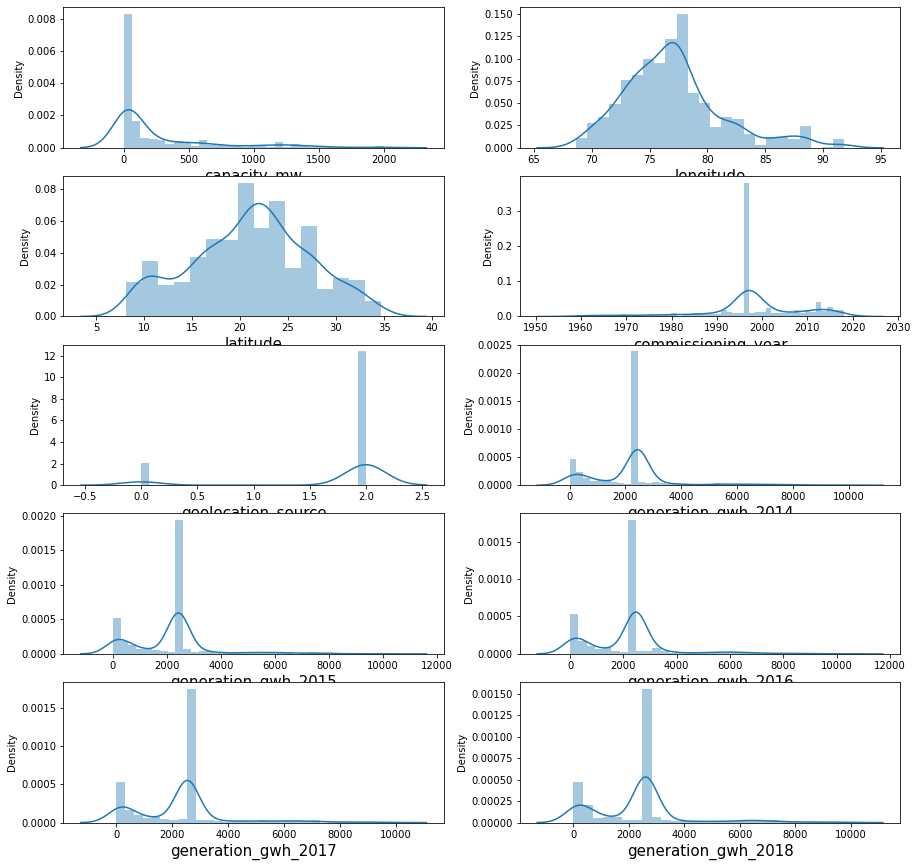

In [135]:
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in global_plant[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

In [136]:
#Target Column "capacity_mw"
global_power.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
primary_fuel           0.420074
commissioning_year    -0.836962
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

### Observation:

* Skewness threshold taken is +/-0.5
* All the columns are not normallly distributed
* Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'
* The 'capacity_mw' column data is highly skewed but we will not remove skewness from it as it is a Target column.
* Also we will not remove skewness from 'primary_fuel' and 'geolocation_source' as it contains categorical data.


### Checking skewness through data visualization

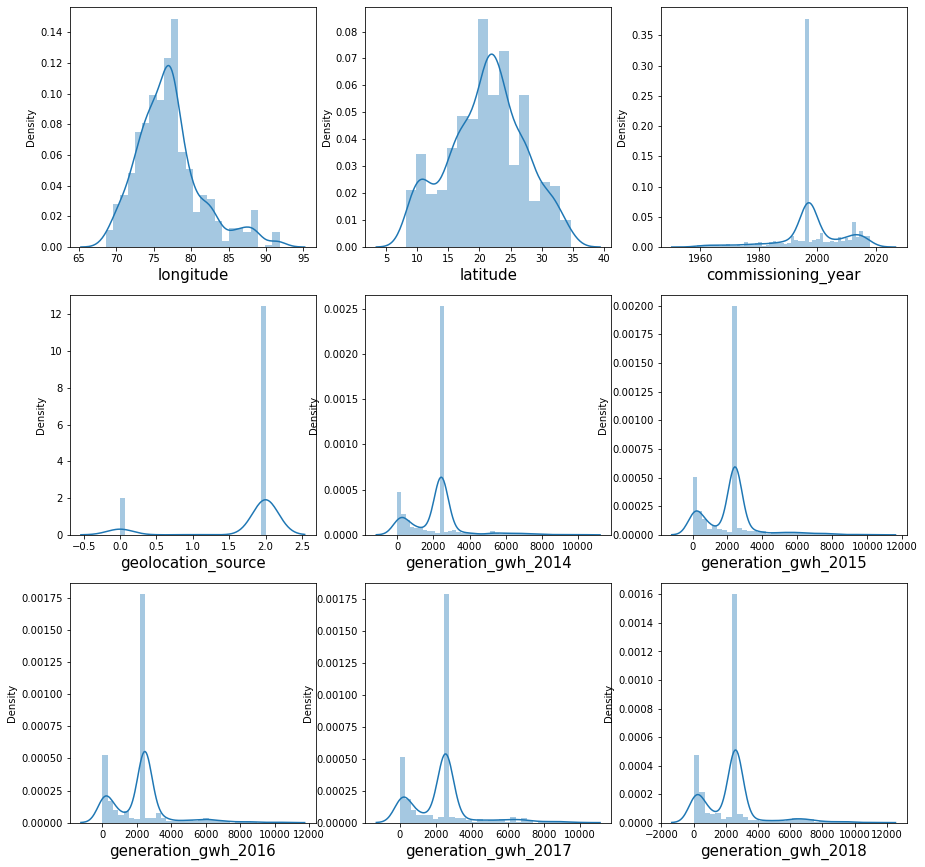

In [137]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in global_power[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(global_power[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

### Removing skewness using yeo-johnson method

## Target Column is "primary_fuel"

In [138]:
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

global_plant[collist]=power_transform(global_plant[collist],method='yeo-johnson')
global_plant[collist]

,capacity_mw,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,-0.928072,1.164277,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,-0.509209,0.595264,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,-2.363978,0.122311,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,2.442106,0.446997,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,1.253969,0.131611,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...
902,1.692530,0.219861,-0.793140,1.926982,0.409608,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
903,-1.597223,0.409525,-1.339555,-0.181973,-2.447802,0.327200,0.356092,0.359399,0.360086,0.375133
904,-0.502886,-0.235273,-0.957619,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
905,0.118754,-0.768095,0.526266,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133


### Checking skewness again after removal

In [139]:
global_plant.skew()

capacity_mw            0.015527
latitude              -0.069694
longitude              0.000035
primary_fuel           0.408694
commissioning_year     0.031733
geolocation_source    -2.035892
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

## Checking skewness through data visualization again after removal

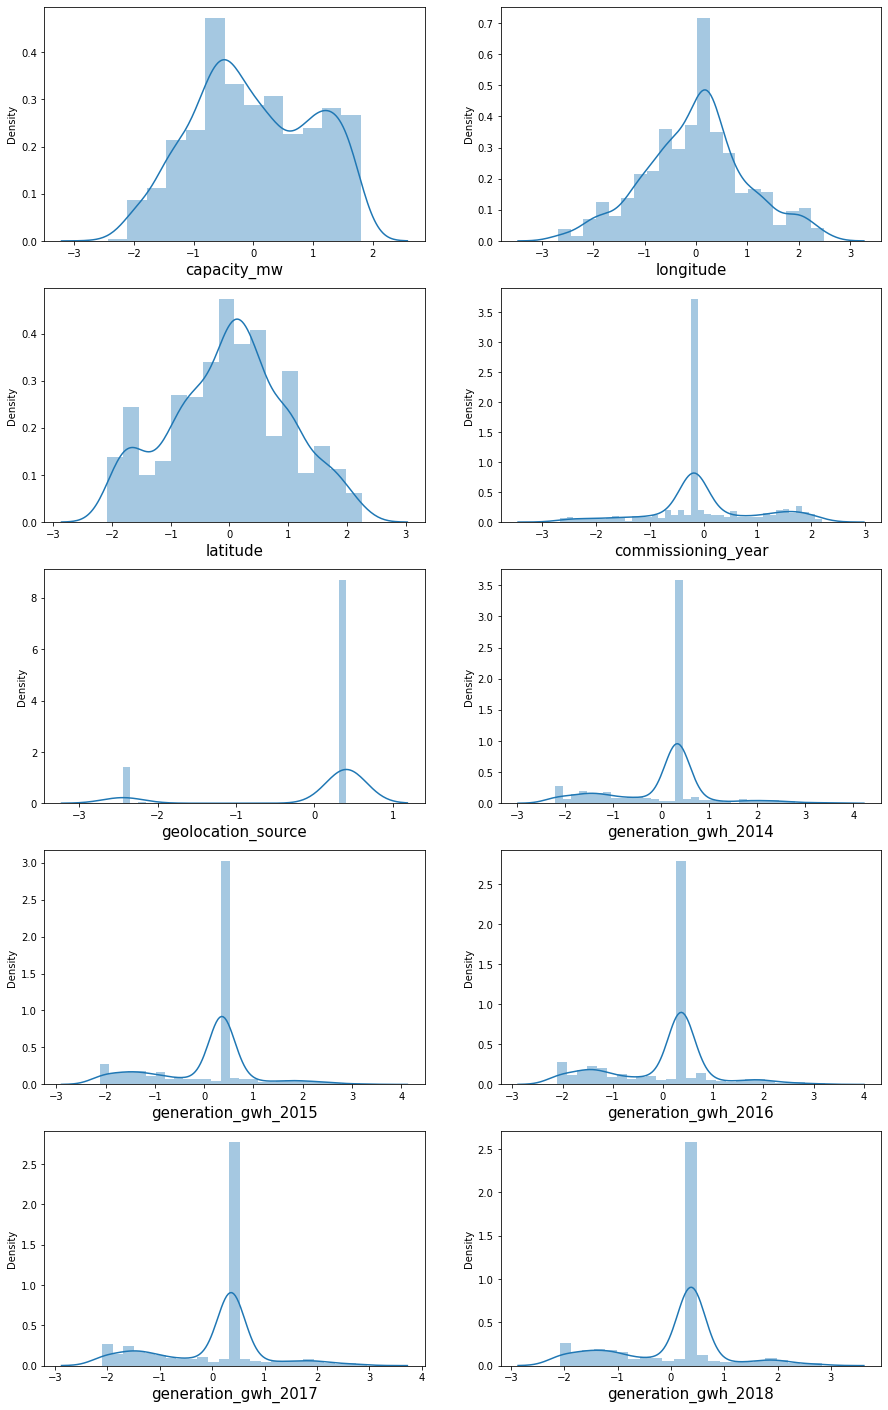

In [140]:
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,25))
plotnumber = 1

for column in global_plant[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

### Target Column is "capacity_mw"

In [141]:
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
global_power[collist]=power_transform(global_power[collist],method='yeo-johnson')
global_power[collist]

,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932921,1.167827,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.513810,0.596640,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.368066,0.122069,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.447853,0.447846,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.253377,0.131399,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
902,0.216288,-0.795932,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,0.406355,-1.343416,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
904,-0.239580,-0.960773,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
905,-0.772877,0.527395,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


### Checking skewness again after removal

In [142]:
global_power.skew()

capacity_mw            2.163488
latitude              -0.068504
longitude             -0.000494
primary_fuel           0.420074
commissioning_year     0.028796
geolocation_source    -2.047591
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

### Checking skewness through data visualization again after removal

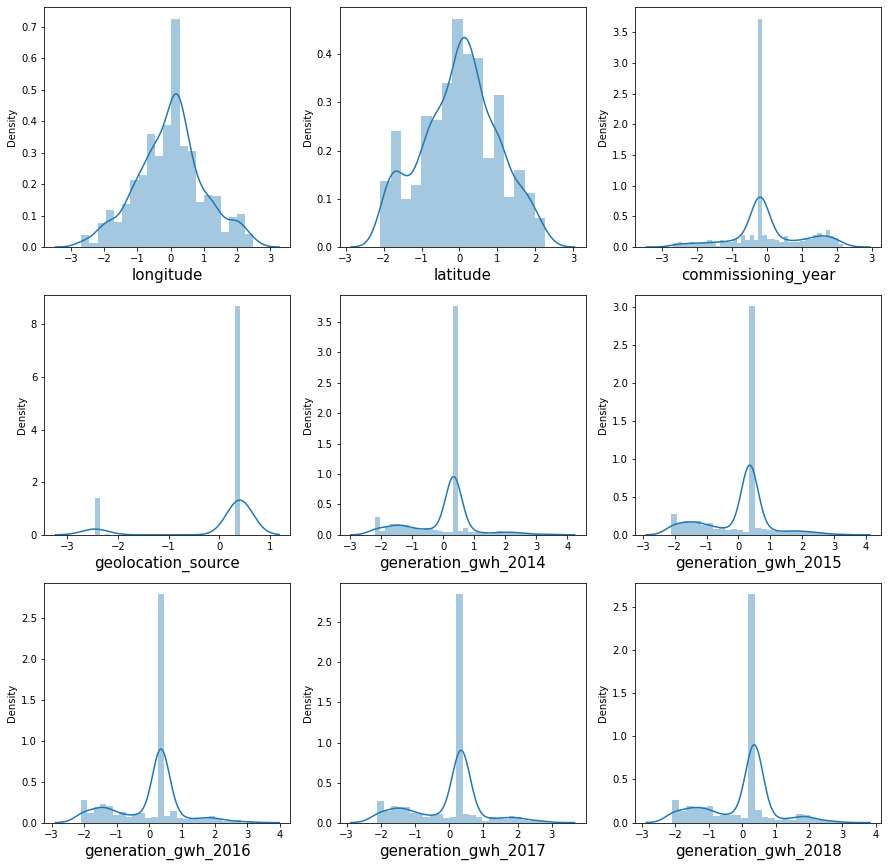

In [143]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in global_power[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(global_power[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Now we can see that the data is almost normally distributed. But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.

# Data preprocessing

## Spliting data into Target and Features:

#### Target Variable is primary_fuel

In [144]:
x=global_plant.drop("primary_fuel",axis=1)
y=global_plant["primary_fuel"]

In [145]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,1.164277,-0.928072,1.292854,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,0.595264,-0.509209,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,0.122311,-2.363978,-0.181973,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,0.446997,2.442106,0.501339,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,0.131611,1.253969,1.795252,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435


In [146]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [147]:
x.shape, y.shape

((849, 10), (849,))

In [148]:
y.value_counts()

1    235
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [149]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [150]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [151]:
y.value_counts()

6    235
1    235
7    235
2    235
3    235
0    235
5    235
4    235
Name: primary_fuel, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

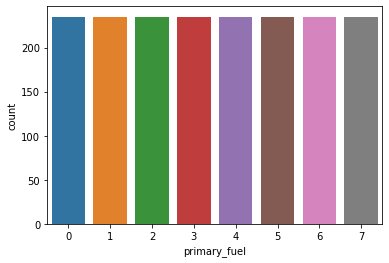

In [152]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

### Scaling data using Standard Scaler

In [154]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [155]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.756564,1.453891,-0.907869,1.671710,-2.471607,0.304777,0.345834,0.357847,0.319339,0.375784
1,0.198261,0.854061,-0.430726,-0.171510,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784
2,-0.312126,0.355493,-2.543570,-0.171510,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784
3,0.375234,0.697764,2.931239,0.682485,0.372165,-0.984170,-0.665947,-0.584583,-0.848612,-0.818520
4,1.761701,0.365298,1.577783,2.299601,0.372165,0.622712,1.780542,1.781517,1.431453,1.980136


## Target Variable is capacity_mw

In [156]:
x1=global_power.drop("capacity_mw",axis=1)
y1=global_power["capacity_mw"]

In [157]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,6,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,1,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368066,7,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,2,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,1,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


In [158]:
y1.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [159]:
y1.value_counts()

5.00       37
10.00      21
15.00      20
600.00     20
1200.00    19
           ..
119.80      1
21.84       1
195.00      1
645.00      1
106.60      1
Name: capacity_mw, Length: 334, dtype: int64

### Scaling data using Standard Scaler

In [160]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

In [161]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.167827,-0.932921,1.179853,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596640,-0.513810,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.122069,-2.368065,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.447846,2.447853,-0.542339,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.131399,1.253377,-0.972887,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635


# Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

### Target Variable is primary_fuel

In [162]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [163]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [164]:
x.columns[var_threshold.get_support()]

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [165]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

### Target Variable is capacity_mw

In [166]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [167]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [168]:
x1.columns[var_threshold.get_support()]

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [169]:
# taking  out  all the  constant  columns 
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

## SelectKBest method


### Target Variable is primary_fuel

In [170]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [171]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

               Feature        Score
4   geolocation_source  8514.084893
0          capacity_mw   471.575803
5  generation_gwh_2014   212.739730
6  generation_gwh_2015   162.073435
9  generation_gwh_2018   160.235053
7  generation_gwh_2016   154.592075
8  generation_gwh_2017   124.606287
2            longitude    66.422109
1             latitude    55.704463
3   commissioning_year    50.278211


Selecting the best features based on above scores, we can see that the column "commissioning_year" has most lowest features for the prediction, so we will drop this column.

In [172]:
x = x.drop([ "commissioning_year"],axis=1)

In [173]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.756564,1.453891,-0.907869,-2.471607,0.304777,0.345834,0.357847,0.319339,0.375784
1,0.198261,0.854061,-0.430726,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784
2,-0.312126,0.355493,-2.543570,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784
3,0.375234,0.697764,2.931239,0.372165,-0.984170,-0.665947,-0.584583,-0.848612,-0.818520
4,1.761701,0.365298,1.577783,0.372165,0.622712,1.780542,1.781517,1.431453,1.980136
...,...,...,...,...,...,...,...,...,...
1875,-0.771298,-1.678880,0.429456,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784
1876,-0.559196,-0.766264,-0.120809,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784
1877,-0.402882,0.511363,-2.050038,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784
1878,-0.610884,0.320733,0.317800,0.372165,0.304777,0.345834,0.357847,0.319339,0.375784


### Target Variable is capacity_mw

In [174]:
best_fit1 = SelectKBest(score_func = f_classif, k ='all')
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)

In [175]:
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis = 1)
featureScores1.columns = ['Feature', 'Score']
print(featureScores1.nlargest(11,'Score'))

               Feature     Score
9  generation_gwh_2018  4.769757
8  generation_gwh_2017  4.381400
7  generation_gwh_2016  3.957211
5  generation_gwh_2014  3.396666
6  generation_gwh_2015  3.378346
4   geolocation_source  3.275491
2         primary_fuel  3.196157
3   commissioning_year  2.276087
1            longitude  1.710206
0             latitude  1.404031


Selecting the best features based on above scores, we can see that the column "latitude" has most lowest features for the prediction, so we will drop this column.

In [176]:
x1 = x1.drop([ "latitude"],axis=1)

In [177]:
x1

,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932921,1.179853,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.513810,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.368065,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.447853,-0.542339,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.253377,-0.972887,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
850,0.216288,-0.972887,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
851,0.406355,1.179853,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
852,-0.239580,1.610401,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
853,-0.772877,-0.972887,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


Now, we have completed features selection process through using 2 techniques.

# Checking for Multicolinearity

## VIF (Variance Inflation factor)

### Target Variable is primary_fuel

In [178]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.365151,capacity_mw
1,1.152713,latitude
2,1.163719,longitude
3,1.451873,geolocation_source
4,6.228704,generation_gwh_2014
5,11.511689,generation_gwh_2015
6,18.219013,generation_gwh_2016
7,8.433658,generation_gwh_2017
8,14.741618,generation_gwh_2018


The VIF value is more than 10 in the columns generation_gwh_2015, 'generation_gwh_2016' and 'generation_gwh_2018'. But column 'generation_gwh_2016' is having highest VIF value. So, we will drop column 'generation_gwh_2016'.

In [179]:
x.drop('generation_gwh_2016', axis =1, inplace=True)

In [180]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-1.756564,1.453891,-0.907869,-2.471607,0.304777,0.345834,0.319339,0.375784
1,0.198261,0.854061,-0.430726,0.372165,0.304777,0.345834,0.319339,0.375784
2,-0.312126,0.355493,-2.543570,0.372165,0.304777,0.345834,0.319339,0.375784
3,0.375234,0.697764,2.931239,0.372165,-0.984170,-0.665947,-0.848612,-0.818520
4,1.761701,0.365298,1.577783,0.372165,0.622712,1.780542,1.431453,1.980136
...,...,...,...,...,...,...,...,...
1875,-0.771298,-1.678880,0.429456,0.372165,0.304777,0.345834,0.319339,0.375784
1876,-0.559196,-0.766264,-0.120809,0.372165,0.304777,0.345834,0.319339,0.375784
1877,-0.402882,0.511363,-2.050038,0.372165,0.304777,0.345834,0.319339,0.375784
1878,-0.610884,0.320733,0.317800,0.372165,0.304777,0.345834,0.319339,0.375784


### Checking again Multicolinearity using VIF

In [181]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.364789,capacity_mw
1,1.152653,latitude
2,1.147736,longitude
3,1.451022,geolocation_source
4,6.224701,generation_gwh_2014
5,8.772124,generation_gwh_2015
6,7.385536,generation_gwh_2017
7,11.835807,generation_gwh_2018


Here we can see that Multicolinearity is still present in the column "generation_gwh_2018". So, we will again drop highest VIF value column which is 'generation_gwh_2018' for removing Multicolinearity.

In [182]:
x.drop('generation_gwh_2018', axis =1, inplace=True)

## Checking again Multicolinearity using VIF

In [183]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.355197,capacity_mw
1,1.140377,latitude
2,1.147628,longitude
3,1.450690,geolocation_source
4,6.070102,generation_gwh_2014
5,7.581586,generation_gwh_2015
6,3.470368,generation_gwh_2017


**Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.**

## VIF for Target Variable is capacity_mw

In [184]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.267875,longitude
1,1.480675,primary_fuel
2,1.092229,commissioning_year
3,1.355969,geolocation_source
4,4.126983,generation_gwh_2014
5,7.728307,generation_gwh_2015
6,10.642643,generation_gwh_2016
7,11.549391,generation_gwh_2017
8,11.332709,generation_gwh_2018


The VIF value is more than 10 in the columns 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'. But column 'generation_gwh_2017' is having highest VIF value. So, we will drop column 'generation_gwh_2017'.

In [185]:
x1.drop('generation_gwh_2017', axis =1, inplace=True)

## Checking again Multicolinearity using VIF

In [186]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.266319,longitude
1,1.480675,primary_fuel
2,1.091987,commissioning_year
3,1.355848,geolocation_source
4,4.125029,generation_gwh_2014
5,7.688435,generation_gwh_2015
6,9.684429,generation_gwh_2016
7,5.200834,generation_gwh_2018


**Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.**

## Creating Model

We are using Classification Model for Target Variable, primary_fuel and Regression Model for Target Variable, capacity_mw

## Classification Model

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

## Finding the best random state among all the models

In [188]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8475177304964538  on Random_state  30


**At random state 45, we are getting best accuracy score i.e., 85%/**

## Creating train-test-split

In [189]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [190]:
x.shape, y.shape

((1880, 7), (1880,))

In [191]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((1316, 7), (1316,), (564, 7), (564,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided.

### Logistic Regression

In [192]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.5585106382978723
confusion_matrix: 
 [[27  0  0  0  0  0  0 47]
 [ 8 21  6 12 20  1  0  4]
 [ 0  4 40 10  3  7  0  4]
 [ 9 10  5 24  3  9  0  3]
 [ 0 13  0  1 65  3  0  0]
 [ 0  0  0  3  0 37  0 27]
 [ 0  0  0  0  0  0 71  0]
 [28  5  0  0  2  2  0 30]]
classification_report: 
               precision    recall  f1-score   support

           0       0.38      0.36      0.37        74
           1       0.40      0.29      0.34        72
           2       0.78      0.59      0.67        68
           3       0.48      0.38      0.42        63
           4       0.70      0.79      0.74        82
           5       0.63      0.55      0.59        67
           6       1.00      1.00      1.00        71
           7       0.26      0.45      0.33        67

    accuracy                           0.56       564
   macro avg       0.58      0.55      0.56       564
weighted avg       0.58      0.56      0.56       564



Here we are getting 61% accuracy using Logistic Regression.

### Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

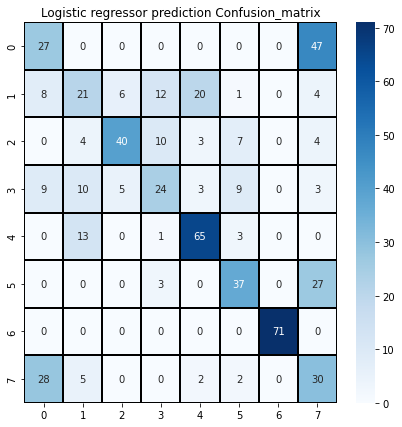

In [193]:
cm = confusion_matrix(y_test,pred_lr)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("Logistic regressor prediction Confusion_matrix")

## Random Forest Classifier

In [194]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8723404255319149
confusion_matrix: 
 [[69  3  0  0  0  0  0  2]
 [ 2 40  4 10 10  3  0  3]
 [ 0  1 59  3  1  3  0  1]
 [ 4  3  0 49  2  2  0  3]
 [ 0  0  0  0 82  0  0  0]
 [ 1  0  1  0  0 65  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 3  1  0  4  0  1  1 57]]
classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        74
           1       0.83      0.56      0.67        72
           2       0.92      0.87      0.89        68
           3       0.74      0.78      0.76        63
           4       0.86      1.00      0.93        82
           5       0.88      0.97      0.92        67
           6       0.99      1.00      0.99        71
           7       0.86      0.85      0.86        67

    accuracy                           0.87       564
   macro avg       0.87      0.87      0.87       564
weighted avg       0.87      0.87      0.87       564



Here we are getting 89% accuracy using RFC.

## Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

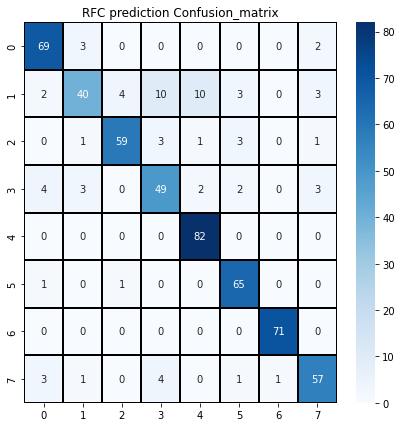

In [195]:
cm = confusion_matrix(y_test,pred_rfc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("RFC prediction Confusion_matrix")

## Decision Tree Classifier

In [196]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.849290780141844
confusion_matrix: 
 [[68  3  0  1  0  0  0  2]
 [ 3 43  6 10  5  3  0  2]
 [ 0  4 55  3  1  4  0  1]
 [ 3  3  6 45  2  2  0  2]
 [ 0  2  0  0 78  2  0  0]
 [ 1  0  2  0  0 64  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 2  3  1  4  0  1  1 55]]
classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        74
           1       0.74      0.60      0.66        72
           2       0.79      0.81      0.80        68
           3       0.71      0.71      0.71        63
           4       0.91      0.95      0.93        82
           5       0.84      0.96      0.90        67
           6       0.99      1.00      0.99        71
           7       0.89      0.82      0.85        67

    accuracy                           0.85       564
   macro avg       0.84      0.85      0.84       564
weighted avg       0.85      0.85      0.85       564



Here we are getting 84% accuracy using DTC.

### Confusion Matrix for DTC

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

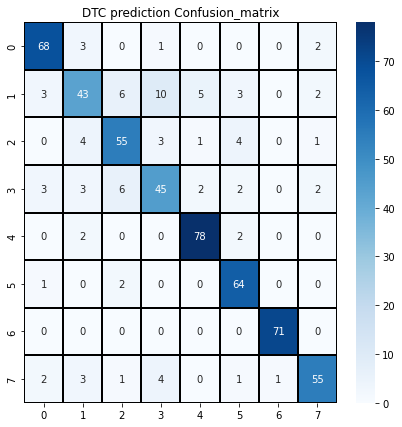

In [197]:
cm = confusion_matrix(y_test,pred_dtc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("DTC prediction Confusion_matrix")

## Support Vector Machine Classifier

In [198]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.6382978723404256
confusion_matrix: 
 [[55  0  0  0  0  1  0 18]
 [ 9 28  7  8 16  2  0  2]
 [ 1  6 39 11  1  7  0  3]
 [ 7  9  8 23  3  8  0  5]
 [ 0 13  0  0 69  0  0  0]
 [ 3  0  0  0  0 46  0 18]
 [ 0  0  0  0  1  0 70  0]
 [24 10  2  0  0  1  0 30]]
classification_report: 
               precision    recall  f1-score   support

           0       0.56      0.74      0.64        74
           1       0.42      0.39      0.41        72
           2       0.70      0.57      0.63        68
           3       0.55      0.37      0.44        63
           4       0.77      0.84      0.80        82
           5       0.71      0.69      0.70        67
           6       1.00      0.99      0.99        71
           7       0.39      0.45      0.42        67

    accuracy                           0.64       564
   macro avg       0.64      0.63      0.63       564
weighted avg       0.64      0.64      0.63       564



Here we are getting 66% accuracy using SVC.

## Confusion Matrix for SVC

Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

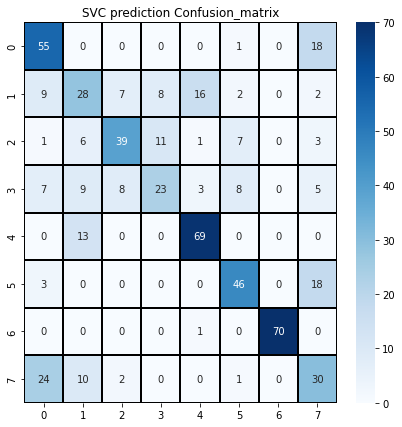

In [199]:
cm = confusion_matrix(y_test,pred_svc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("SVC prediction Confusion_matrix")

# KNN Classifier

In [200]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8315602836879432
confusion_matrix: 
 [[69  2  0  0  0  0  0  3]
 [ 4 34  7  6 12  4  1  4]
 [ 1  2 57  1  1  3  0  3]
 [ 5  3  6 40  1  4  0  4]
 [ 0  1  0  0 81  0  0  0]
 [ 1  0  2  0  0 64  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 7  1  0  3  0  0  3 53]]
classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        74
           1       0.79      0.47      0.59        72
           2       0.79      0.84      0.81        68
           3       0.80      0.63      0.71        63
           4       0.85      0.99      0.92        82
           5       0.85      0.96      0.90        67
           6       0.95      1.00      0.97        71
           7       0.79      0.79      0.79        67

    accuracy                           0.83       564
   macro avg       0.83      0.83      0.82       564
weighted avg       0.83      0.83      0.82       564



Here we are getting 83% accuracy using KNN.

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

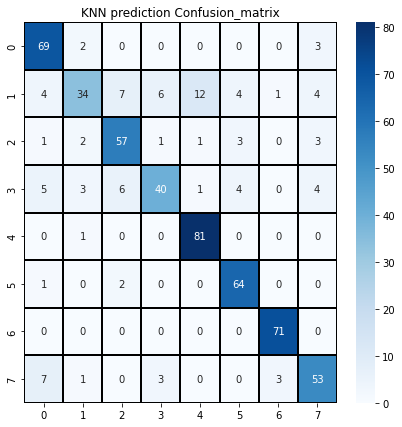

In [201]:
cm = confusion_matrix(y_test,pred_knn)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("KNN prediction Confusion_matrix")

## Gradient Boosting Classifier

In [202]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.8475177304964538
confusion_matrix: 
 [[69  2  0  0  0  0  0  3]
 [ 2 40  5  9  8  2  0  6]
 [ 0  2 52  5  3  4  0  2]
 [ 3  4  1 47  2  1  0  5]
 [ 0  1  1  1 78  1  0  0]
 [ 2  0  2  0  0 63  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 3  3  0  3  0  0  0 58]]
classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        74
           1       0.77      0.56      0.65        72
           2       0.85      0.76      0.81        68
           3       0.72      0.75      0.73        63
           4       0.86      0.95      0.90        82
           5       0.89      0.94      0.91        67
           6       1.00      1.00      1.00        71
           7       0.78      0.87      0.82        67

    accuracy                           0.85       564
   macro avg       0.84      0.84      0.84       564
weighted avg       0.85      0.85      0.84       564



Here we are getting 87% accuracy using RFC.

## Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

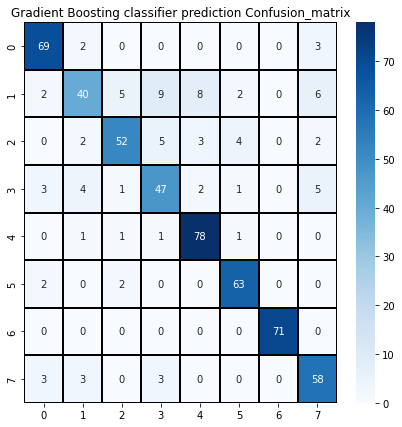

In [203]:
cm = confusion_matrix(y_test,pred_gb)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

# Cross Validation Score for all the Regression model


#### CV Score for Logistic Regression

In [204]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.5441489361702126


## CV Score for Random Forest Classifier

In [205]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.872872340425532


### CV Score for Decision Tree Classifier

In [206]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8212765957446807


### CV Score for Support Vector Classifier

In [207]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.6313829787234042


## CV Score for KNN Classifier

In [208]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.8356382978723405


## CV Score for Gradient Boosting Classifier

In [209]:
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.8595744680851064


### From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

## Hyper parameter tuning for best model using GridsearchCV

In [210]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [211]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [212]:
rfc=RandomForestClassifier(random_state=30)

In [214]:
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [215]:
CV_rfc = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [216]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [217]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'n_estimators': 900}

In [218]:
Power_Plant = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
Power_Plant.fit(x_train, y_train)
pred = Power_Plant.predict(x_test)
acc=accuracy_score(y_test,pred)
print("accuracy score: ",acc*100)

accuracy score:  80.67375886524822


In [219]:
# calculating the scores 
score = cross_val_score(rfc,x,y,cv=10,scoring="accuracy").mean()
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

confusion_matrix: 
 [[58  0  0  0  0  0  0  2]
 [ 5 40 11  3 15  1  0  6]
 [ 1  5 45  1  2  2  0  1]
 [ 8  3 13 35  4  2  0  5]
 [ 0  0  0  0 83  0  0  0]
 [ 7  0  0  0  0 72  0  0]
 [ 0  0  0  0  0  0 67  2]
 [ 9  1  0  0  0  0  0 55]]
classification_report: 
               precision    recall  f1-score   support

           0       0.66      0.97      0.78        60
           1       0.82      0.49      0.62        81
           2       0.65      0.79      0.71        57
           3       0.90      0.50      0.64        70
           4       0.80      1.00      0.89        83
           5       0.94      0.91      0.92        79
           6       1.00      0.97      0.99        69
           7       0.77      0.85      0.81        65

    accuracy                           0.81       564
   macro avg       0.82      0.81      0.80       564
weighted avg       0.82      0.81      0.80       564



## Confusion Matrix

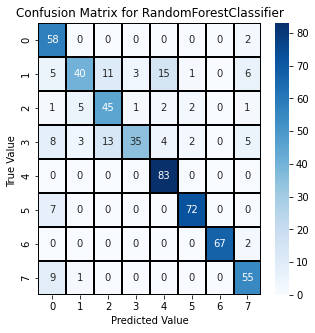

In [220]:
cm = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## ROC-AUC Curve

In [221]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

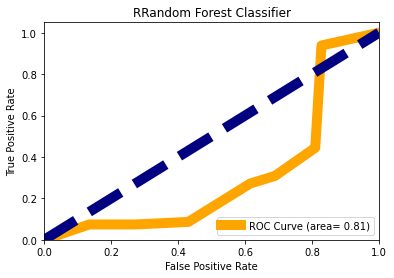

In [222]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RRandom Forest Classifier")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the model has the area under curve as 0.79.

## Saving the Classification Model

In [223]:
filename='Global_Power_Plant.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([4, 6, 5, 3, 4, 4, 0, 4, 7, 4, 3, 3, 4, 6, 0, 0, 2, 1, 2, 0, 1, 5,
       0, 5, 4, 6, 6, 1, 0, 4, 1, 6, 6, 5, 0, 3, 2, 2, 4, 5, 0, 0, 1, 1,
       0, 2, 5, 1, 5, 4, 5, 6, 3, 4, 5, 7, 4, 5, 4, 1, 5, 2, 7, 1, 4, 3,
       1, 4, 2, 7, 6, 2, 5, 6, 6, 4, 4, 5, 4, 6, 7, 6, 2, 3, 7, 3, 1, 4,
       2, 0, 6, 4, 5, 5, 3, 1, 4, 0, 2, 0, 7, 4, 6, 5, 4, 6, 5, 1, 7, 5,
       5, 5, 1, 2, 7, 7, 1, 2, 0, 5, 4, 2, 5, 1, 4, 2, 7, 5, 4, 3, 5, 1,
       7, 6, 7, 2, 3, 4, 1, 3, 7, 6, 1, 6, 2, 6, 7, 1, 7, 4, 0, 2, 6, 1,
       2, 7, 5, 0, 5, 6, 0, 2, 0, 4, 6, 5, 5, 2, 5, 3, 0, 5, 6, 6, 4, 3,
       7, 4, 2, 7, 4, 6, 4, 6, 0, 6, 0, 7, 0, 1, 4, 4, 2, 7, 1, 3, 7, 1,
       0, 1, 1, 4, 7, 5, 6, 3, 7, 2, 2, 7, 2, 0, 1, 1, 5, 0, 2, 5, 1, 0,
       3, 3, 4, 0, 5, 1, 1, 6, 5, 5, 2, 3, 0, 3, 5, 0, 7, 3, 7, 7, 5, 1,
       7, 7, 4, 7, 4, 3, 4, 6, 3, 4, 7, 5, 7, 4, 6, 2, 4, 3, 6, 5, 5, 3,
       5, 1, 1, 5, 4, 7, 1, 3, 4, 1, 7, 0, 4, 4, 0, 7, 2, 4, 7, 6, 7, 0,
       4, 0, 4, 6, 5, 7, 3, 5, 2, 0, 0, 7, 7, 6, 1,

## Checking predicted and original values

In [224]:
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Global_Power_Plant=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Global_Power_Plant

,Orginal,Predicted
0,2,4
1,6,6
2,5,5
3,3,3
4,3,4
...,...,...
559,6,6
560,3,2
561,4,4
562,6,6


## Regression Model

#### Target column is "capacity_mw"

## Finding the best random state among all the models

In [225]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8017852822270587 on random_state: 11


### At random state 37, we are getting best accuracy score i.e., 79%

# Creating train-test-split

In [226]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [227]:
x1.shape, y1.shape

((855, 8), (855,))

In [228]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((598, 8), (598,), (257, 8), (257,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided.

## Linear Regression

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))  

R2 score:  0.4529530782325861
Mean abs error:  250.53600474086534
Mean squared error:  123597.03181910173
Root Mean Squared Error:  351.56369525180173


**R2 score for Linear Regression is 46%**

## Checking the performance of the model by graph

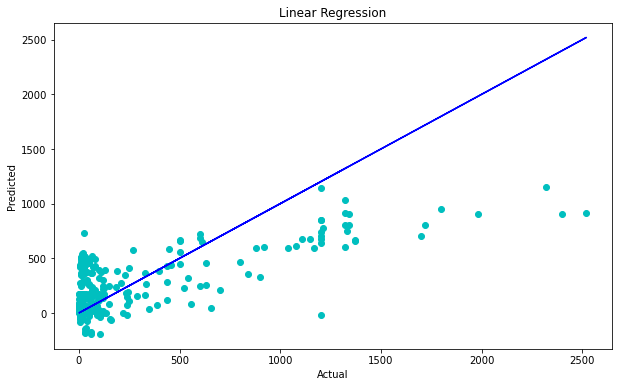

In [231]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

## Random forest Regression Model

In [232]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8464163310058077
Mean abs error:  100.21597596810632
Mean squared error:  34699.92219724125
Root Mean Squared Error:  186.2791512683082


### R2 score for Random forest Regression is 81%

## Checking the performance of the model by graph

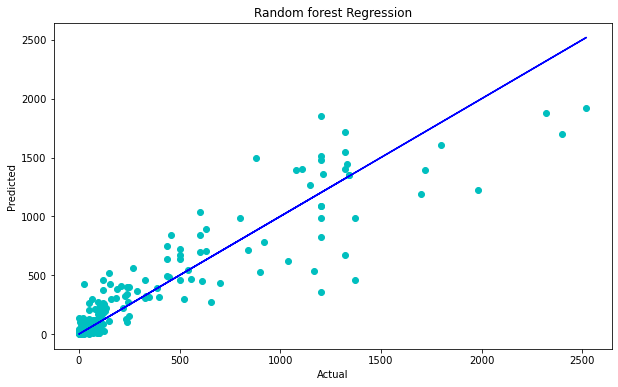

In [233]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest Regression")
plt.show()

# KNN regressor

In [234]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.7492699842285357
Mean abs error:  120.45819282317336
Mean squared error:  56648.679490212424
Root Mean Squared Error:  238.0098306587617


### R2 score for KNN regressor is 73%

# Checking the performance of the model by graph

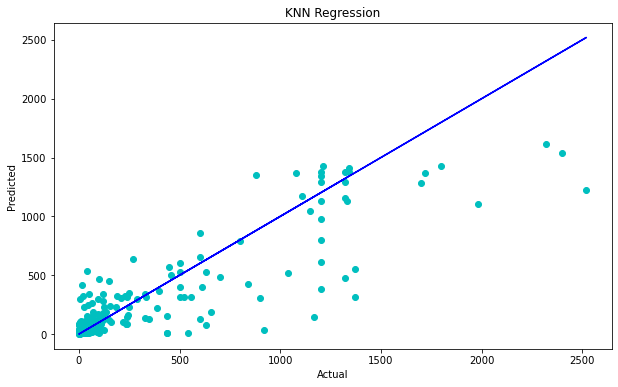

In [235]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression")
plt.show()

## Decision Tree Regressor

In [236]:
# Checking R2 score for Decision Tree Regressor 
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
# prediction
pred_DTR=DTR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_DTR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.7537323642246853
Mean abs error:  116.72202334630349
Mean squared error:  55640.47178365758
Root Mean Squared Error:  235.8823261366938


### R2 score for Decision Tree Regressor is 78%

## Checking the performance of the model by graph

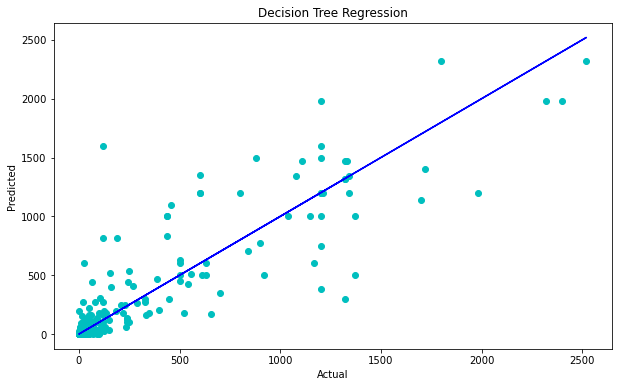

In [237]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_DTR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regression")
plt.show()

## Gradient Boosting Regressor

In [238]:
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.7779107827677008
Mean abs error:  113.82622453352303
Mean squared error:  50177.72142882203
Root Mean Squared Error:  224.003842442093


#### R2 score for Gradient Boosting Regressor is 79%

## Checking the performance of the model by graph

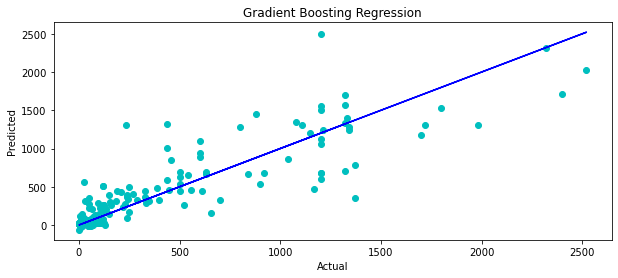

In [239]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,4))
plt.scatter(x=y_test,y=pred_Gb,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting Regression")
plt.show()

## Ridge Regressor

In [240]:
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'lsqr'}


In [241]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.4506169207720828
Mean abs error:  250.7670615884762
Mean squared error:  124124.8514932302
Root Mean Squared Error:  352.3135698397526


#### R2 score for Ridge regressor is 45%

## Checking the performance of the model by graph

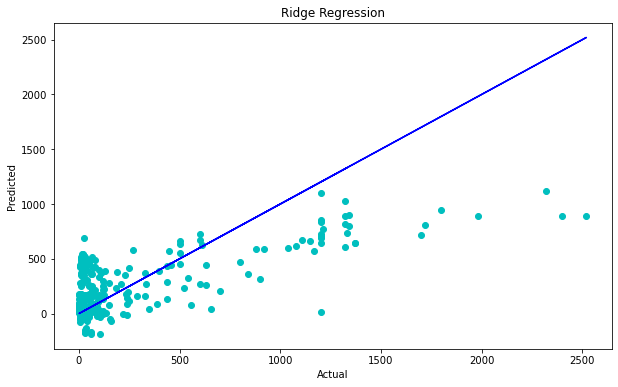

In [242]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression")
plt.show()

## Checking Cross Validation Score of Models

#### Checking CV score for Linear Regression

In [243]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.36489050699583825


### Checking CV score for Random Forest Regression

In [244]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.7807851610582104


### Checking CV score for KNN Regression

In [245]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.710015853496497


## Checking CV score for DTR

In [246]:
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.6440238015128327


### Checking CV score for GBR Regression

In [247]:
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x1,y1,cv=7).mean())

The CV score  for  the GBR regressor is : 0.724640313372216


### Checking CV score for Ridge Regression

In [248]:
print('The CV score  for  the Ridge regressor is :',cross_val_score(ridge,x1,y1,cv=7).mean())

The CV score  for  the Ridge regressor is : 0.3679756007392466


From the observation of R2 Score and cross validation score and their difference we can predict that Random Forest Regressor is the best model.

## Hyper Parameter Tuning

#### The Random Forest Regressor with GridsearchCV

In [249]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [250]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

### Creating Final Regressor Model

In [251]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [252]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

84.64163310058078


**So, after the Hypertuning now we got a accuracy score of 81% on Random Forest Regression**

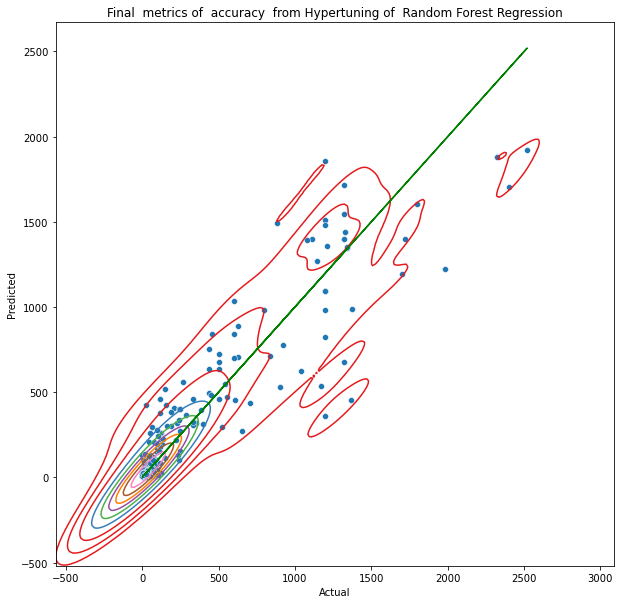

In [253]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_RFR,palette='Set2')
sns.kdeplot(x=y_test,y=pred_RFR, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

### Saving The Predictive Regressor Model

In [254]:
#saving the model at local file system
filename='Global_Power_Plant_Database_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([1457.88291033,  750.80968752, 1080.48481744, 1794.63700491,
         40.17480117,   31.81611406,   20.23056551,   15.13559025,
        202.48175899,  951.83496952,  540.50388701,   23.96691076,
         18.45391431,   31.81611406,   55.67837209,   92.40608815,
         92.98789695,   40.69129394,   54.46043381,   14.86121525,
         38.05932127,   20.36605171,   88.76009133,  907.37233274,
        668.19073018,  238.84090209,  185.16191044,   50.91098516,
         31.81611406,  280.77215679,    6.47248464,   37.27019682,
         22.06488552,   89.99673739,  176.36794965,  121.40731886,
        431.34939727,  311.99275948,   32.20230184,   11.21393005,
         43.20515045,   24.01893592, 1585.25465739,   75.1883509 ,
         23.09247324,   59.61385908,  209.9723652 ,   82.65322716,
        119.76666414, 1586.95339486,   25.86739474,   11.81466032,
        317.99487442,   18.18446824,   25.86739474,  297.95448912,
       1522.24890801, 1439.07160372,   30.69864757,  674.65319

### Prediction of Regressor Model

In [255]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Global_Power_Plant_Database_Project = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Global_Power_Plant_Database_Project

,Original,Predicted
0,1330.0,1457.882910
1,500.0,750.809688
2,1200.0,1080.484817
3,1200.0,1794.637005
4,50.7,40.174801
...,...,...
252,105.0,266.274456
253,10.5,29.941577
254,1720.0,1413.028779
255,1340.0,1321.250028


## Let's plot and visualize

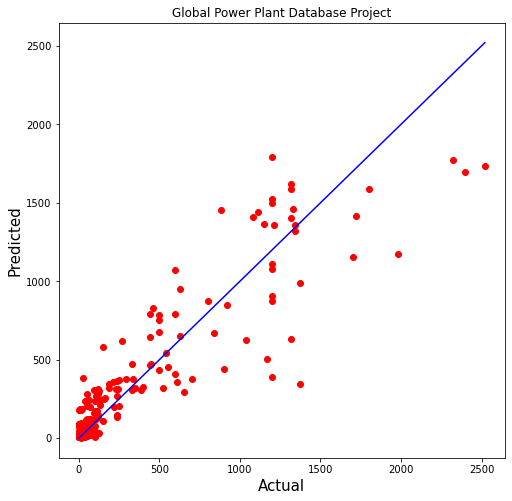

In [256]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Global Power Plant Database Project")
plt.show()